# AmirAliAmini
## 610399102
### project 3, CNS

# Part 1

## Libraries

In [1]:
import pymonntorch as pmt
import torch
from matplotlib import pyplot as plt
from scipy.spatial.distance import cosine


## Headers

In [2]:
import model as mdl
import syn
import dandrit as dnd
import current as cnt
import activity as act
from getDevice import get_device
from dt import TimeResolution
from plot1 import plot
import InputData
import readImage
from latexList1 import LatexParameters


## Neuron models

In [3]:

def LIF(**arg):
    tag = []
    for key in arg.keys():
        tag += [f"{key}={arg[key]}"]
    return mdl.LIF(**arg, tag="|".join(tag))


def ELIF(**arg):
    tag = []
    for key in arg.keys():
        tag += [f"{key}={arg[key]}"]
    return mdl.ELIF(**arg, tag="|".join(tag))


def AELIF(**arg):
    tag = []
    for key in arg.keys():
        tag += [f"{key}={arg[key]}"]
    return mdl.AELIF(**arg, tag="|".join(tag))



In [4]:

def part1(
    input_data,
    title="",
    model_ex=mdl.LIF(),
    model_inh=LIF(tau_m=3, R=10),
    syn_model_ex_ex=syn.RandomConnectivityFix(
        j0=0, connection_number=100, tau=1, variation=30
    ),
    syn_model_ex_inh=syn.FullyConnected(j0=10, variation=50, tau=2),
    syn_model_inh_ex=syn.RandomConnectivityFix(j0=0, connection_number=30, tau=1),
    current_ex=cnt.SteadyCurrent(value=6 and 0),
    current_inh=cnt.SteadyCurrent(value=0.2 and 0),
    DEVICE=get_device(force_cpu=True)[0],
    dt=1,
    iteration=100,
    n_size=1000,
    print_plots=True,
    ex_size=0,
    in_size=0,
    print_activity=True,
    training_rule=syn.STDP(AP=3, AM=-5),
):
    net = pmt.Network(
        device=DEVICE, dtype=torch.float32, behavior={1: TimeResolution(dt=dt)}
    )

    ng1_ex1 = pmt.NeuronGroup(
        size=ex_size or len(input_data.init_kwargs["data"][0]) or int(n_size * 0.8),
        net=net,
        tag="ng1_ex",
        behavior={
            2: current_ex,
            3: InputData.ResetMemory(),
            4: dnd.InpSyn(),
            5: model_ex,
            6: input_data,
            7: act.Activity(),
            9: pmt.Recorder(
                variables=["u", "I", "I_inp", "T", "X"],
                tag="ng1_ex1_rec, ng1_ex1_recorder",
            ),
            10: pmt.EventRecorder("spike", tag="ng1_ex1_evrec"),
        },
    )

    ng2_inh = pmt.NeuronGroup(
        size=in_size or int(n_size * 0.2),
        net=net,
        tag="ng2_inh",
        behavior={
            2: current_inh,
            4: dnd.InpSyn(),
            5: model_inh,
            7: act.Activity(),
            9: pmt.Recorder(
                variables=["u", "I", "I_inp", "T", "X"],
                tag="ng2_inh_rec, ng2_inh_recorder",
            ),
            10: pmt.EventRecorder("spike", tag="ng2_inh_evrec"),
        },
    )

    sg_ex_ex = pmt.SynapseGroup(
        net=net,
        src=ng1_ex1,
        dst=ng1_ex1,
        tag="ex1_ex1",
        behavior={3: syn_model_ex_ex},
    )
    sg_ex_inh = pmt.SynapseGroup(
        net=net,
        src=ng1_ex1,
        dst=ng2_inh,
        tag="ex1_inh",
        behavior={
            3: syn_model_ex_inh,
            8: training_rule,
            9: pmt.Recorder(variables=["W"], tag="sg_ex_inh"),
        },
    )
    sg_inh_ex = pmt.SynapseGroup(
        net=net,
        src=ng2_inh,
        dst=ng1_ex1,
        tag="inh_ex1",
        behavior={3: syn_model_inh_ex},
    )

    LatexParameters(
        {
            "input_current":f"no-current",
            "input_model":f"{model_ex.tag}",
            "input_size":ng1_ex1.size,
            "input_time": 50,
            "rest_time":10,
            "duration_time":60,
            "iteration":iteration,

        }
    )
    net.initialize(info=False)

    net.simulate_iterations(iteration)

    plot_title = f"{title}"

    print_plots and plot(
        net,
        plot_title,
        # [ng1_ex1, ng2_inh],
        ngs=[ng1_ex1],
        scaling_factor=2,
        print_activities=print_activity,
    )
    return net

mps is available but it is forced to use CPU


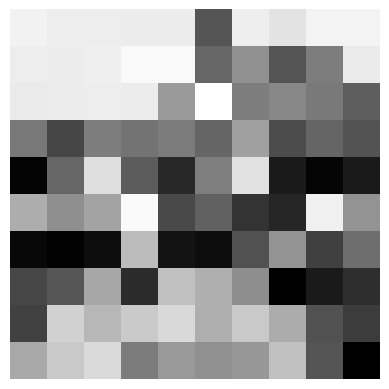

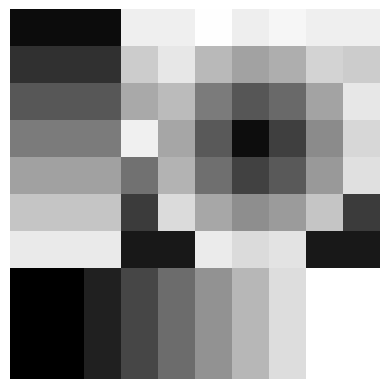

In [5]:
data0=torch.tensor(
            [
                readImage.readImage("1.tif", prefix="./images/"),
                readImage.readImage("2.tif", prefix="./images/")

            ]
        )

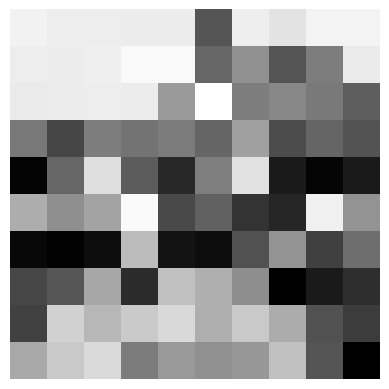

In [6]:
data1=torch.tensor(
            [
                readImage.readImage("1.tif", prefix="./images/")
            ]
        )

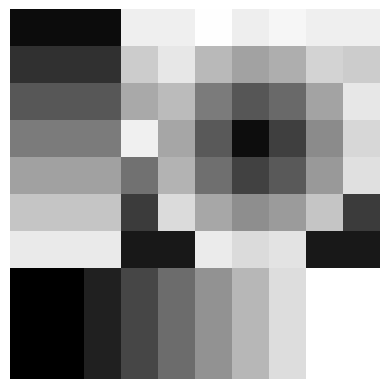

In [7]:
data2=torch.tensor(
            [
                readImage.readImage("2.tif", prefix="./images/")
            ]
        )

In [8]:
data3= torch.tensor([[10,20,30,40,0]])
data4= torch.tensor([[40,30,20,10,0]])
print (data3)
print(data4)

tensor([[10, 20, 30, 40,  0]])
tensor([[40, 30, 20, 10,  0]])


-----------
    \begin{table}[htbp]
        \centering
        \begin{tabular}{||l|l||}
            \hline
            \textbf{Parameter}  & \textbf{Value} \\ \hline \hline \hline
    
            $input\_current$ & $no-current$ \\ \hline  
            $input\_model$ & $LIF$ \\ \hline 
            $input\_size$ & $100$ \\ \hline 
            $input\_time$ & $50$ \\ \hline 
            $rest\_time$ & $10$ \\ \hline 
            $duration\_time$ & $60$ \\ \hline 
            $iteration$ & $60$ \\ \hline 
            
        \end{tabular}
        \caption{Experiment Parameters related to figure number | part 1}
    \end{table}
    ------------
theta: 2, tau: 6.578166246197594, epsilon: 0.001
60xBatch: 1/1 (100%) 57.367ms


/Users/amirali/Library/Mobile Documents/com~apple~CloudDocs/Me/University/Term 8/CNS/HomeWork/amini-amirali-610399102-cns-p03/code/InputData.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(self.data[i])
/Users/amirali/Library/Mobile Documents/com~apple~CloudDocs/Me/University/Term 8/CNS/HomeWork/amini-amirali-610399102-cns-p03/code/plot1.py:85: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


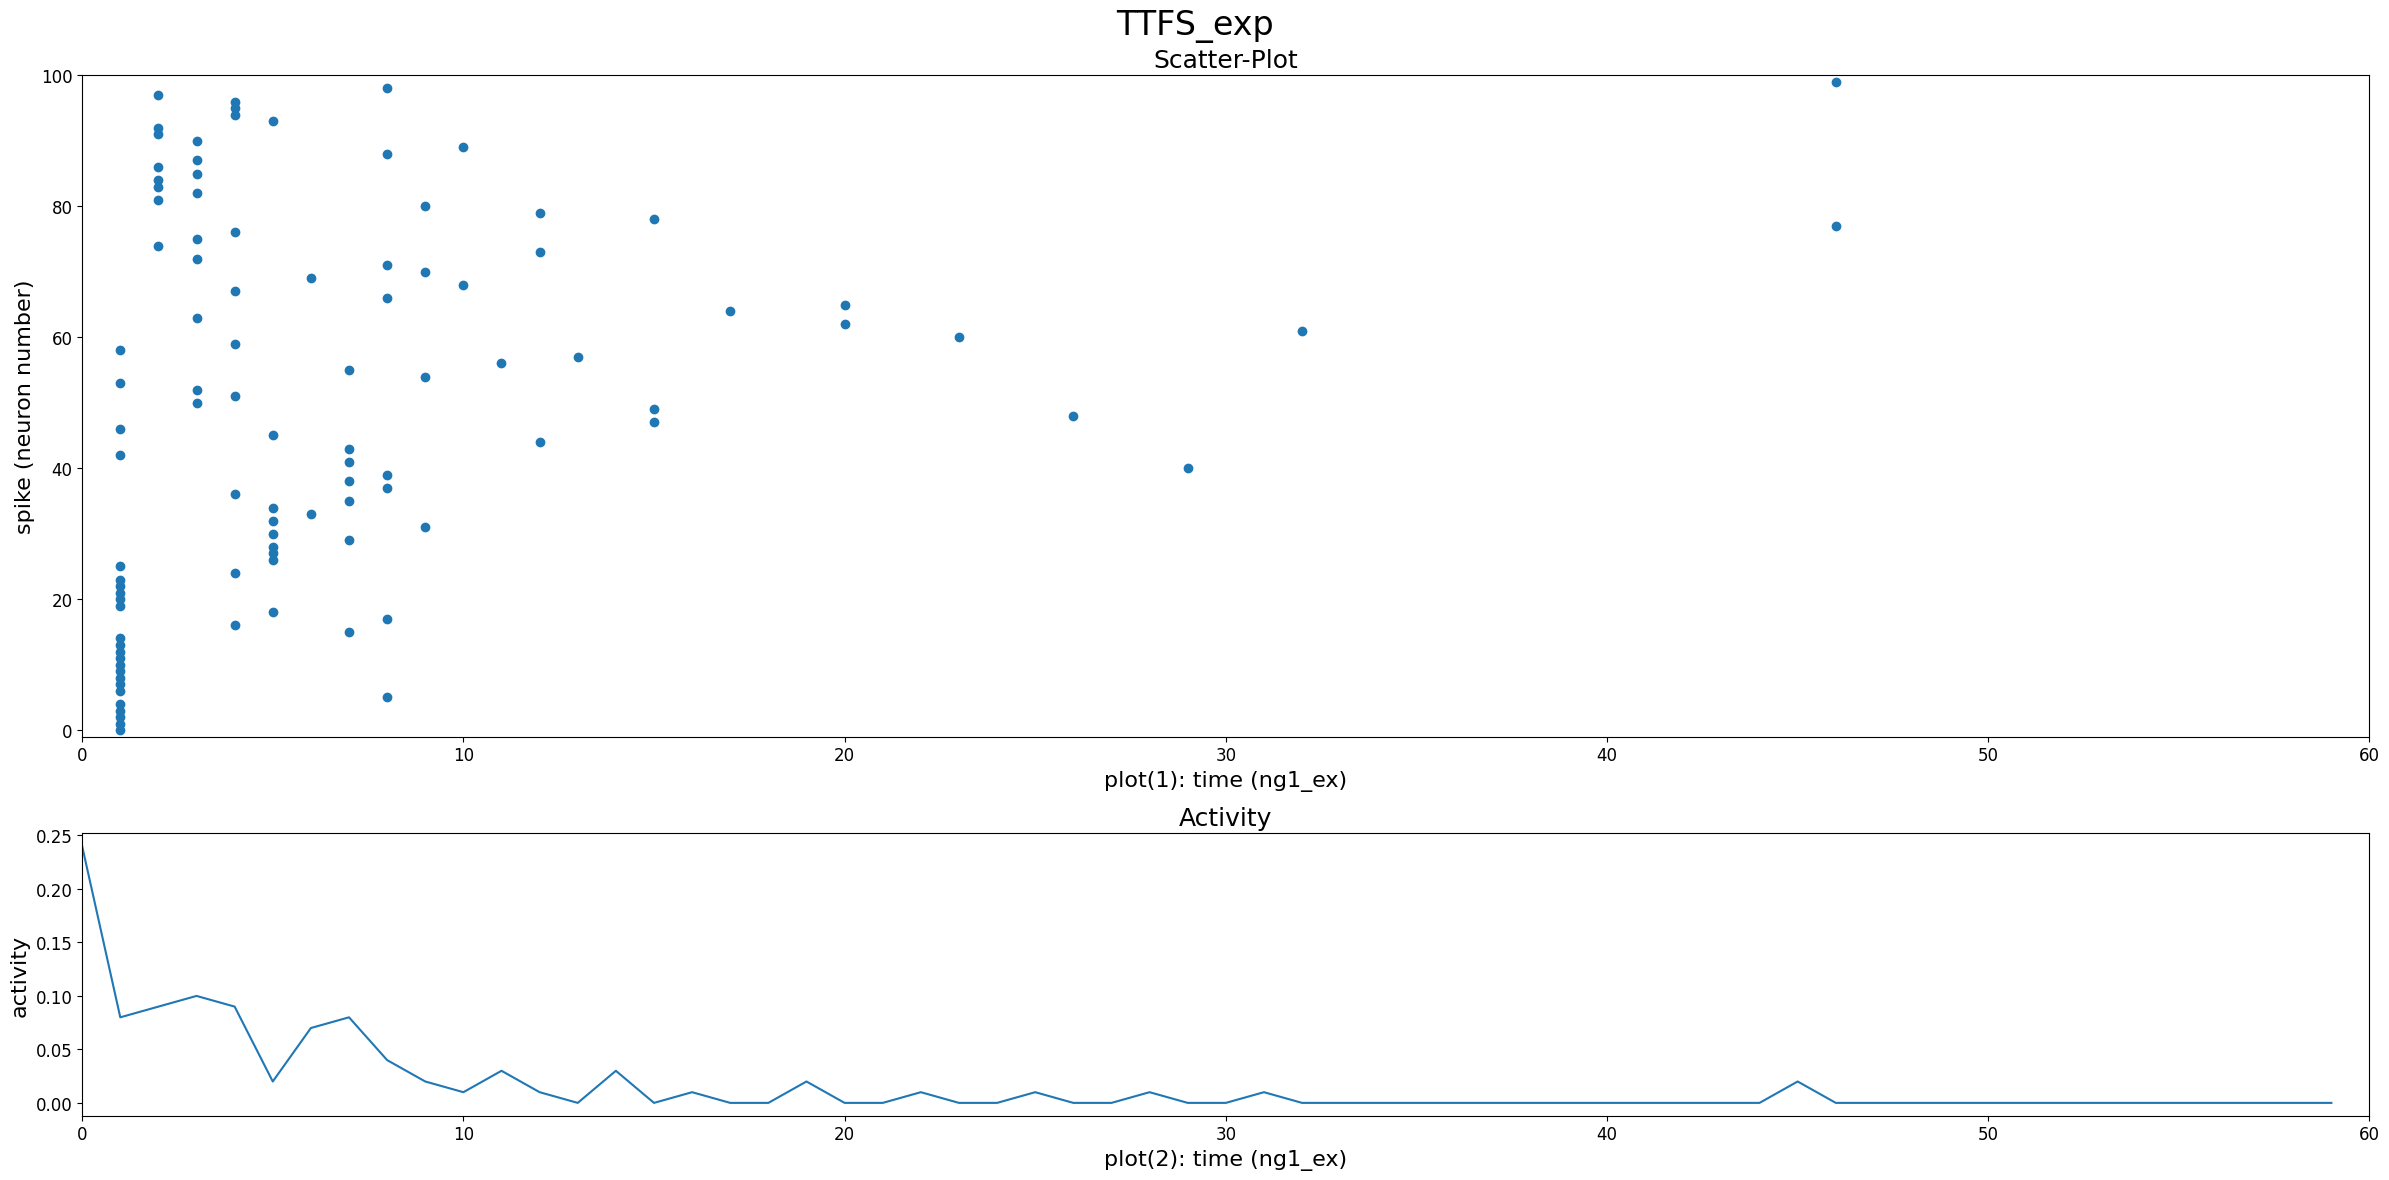

In [9]:
iteration = 60
net = part1(
    iteration=iteration,
    in_size=2,
    syn_model_ex_inh=syn.FullyConnected(j0=1.2, variation=50, tau=2),
    input_data=InputData.Encode(
        data=data1,
        range=255,
        time=50,
        method="TTFS_exp",
    ),
    title = "TTFS_exp"
)

-----------
    \begin{table}[htbp]
        \centering
        \begin{tabular}{||l|l||}
            \hline
            \textbf{Parameter}  & \textbf{Value} \\ \hline \hline \hline
    
            $input\_current$ & $no-current$ \\ \hline  
            $input\_model$ & $LIF$ \\ \hline 
            $input\_size$ & $100$ \\ \hline 
            $input\_time$ & $50$ \\ \hline 
            $rest\_time$ & $10$ \\ \hline 
            $duration\_time$ & $60$ \\ \hline 
            $iteration$ & $60$ \\ \hline 
            
        \end{tabular}
        \caption{Experiment Parameters related to figure number | part 1}
    \end{table}
    ------------
60xBatch: 1/1 (100%) 39.125ms


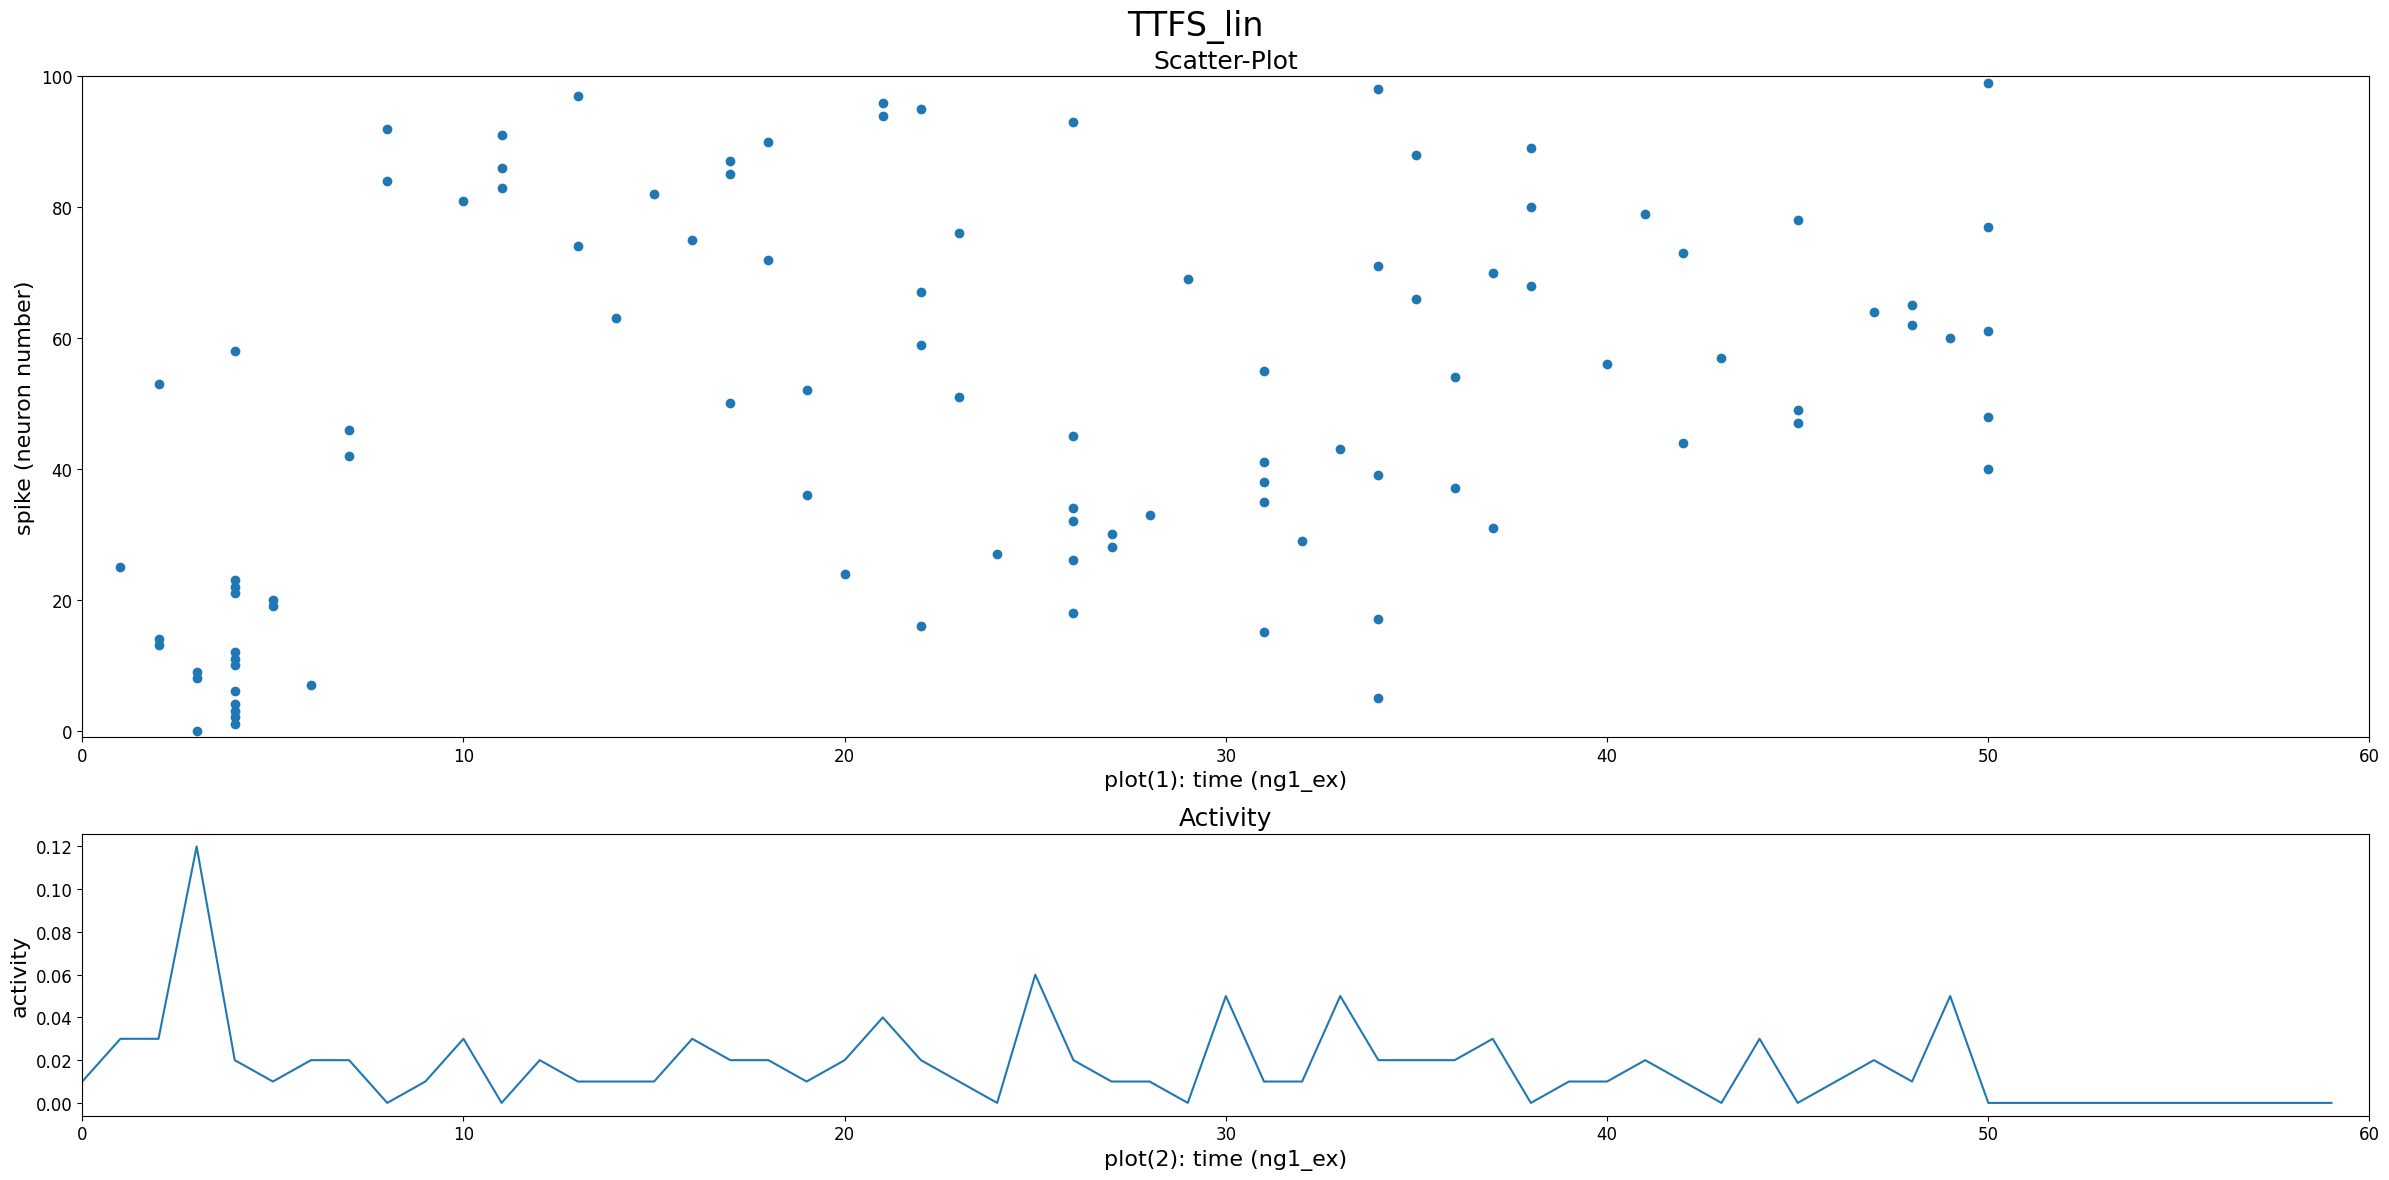

In [10]:
iteration = 60
net = part1(
    iteration=iteration,
    in_size=2,
    syn_model_ex_inh=syn.FullyConnected(j0=1.2, variation=50, tau=2),
    input_data=InputData.Encode(
        data=data1,
        range=255,
        time=50,
        method="TTFS_lin",
    ),
    title ="TTFS_lin"
)

-----------
    \begin{table}[htbp]
        \centering
        \begin{tabular}{||l|l||}
            \hline
            \textbf{Parameter}  & \textbf{Value} \\ \hline \hline \hline
    
            $input\_current$ & $no-current$ \\ \hline  
            $input\_model$ & $LIF$ \\ \hline 
            $input\_size$ & $100$ \\ \hline 
            $input\_time$ & $50$ \\ \hline 
            $rest\_time$ & $10$ \\ \hline 
            $duration\_time$ & $60$ \\ \hline 
            $iteration$ & $60$ \\ \hline 
            
        \end{tabular}
        \caption{Experiment Parameters related to figure number | part 1}
    \end{table}
    ------------
60xBatch: 1/1 (100%) 43.841ms


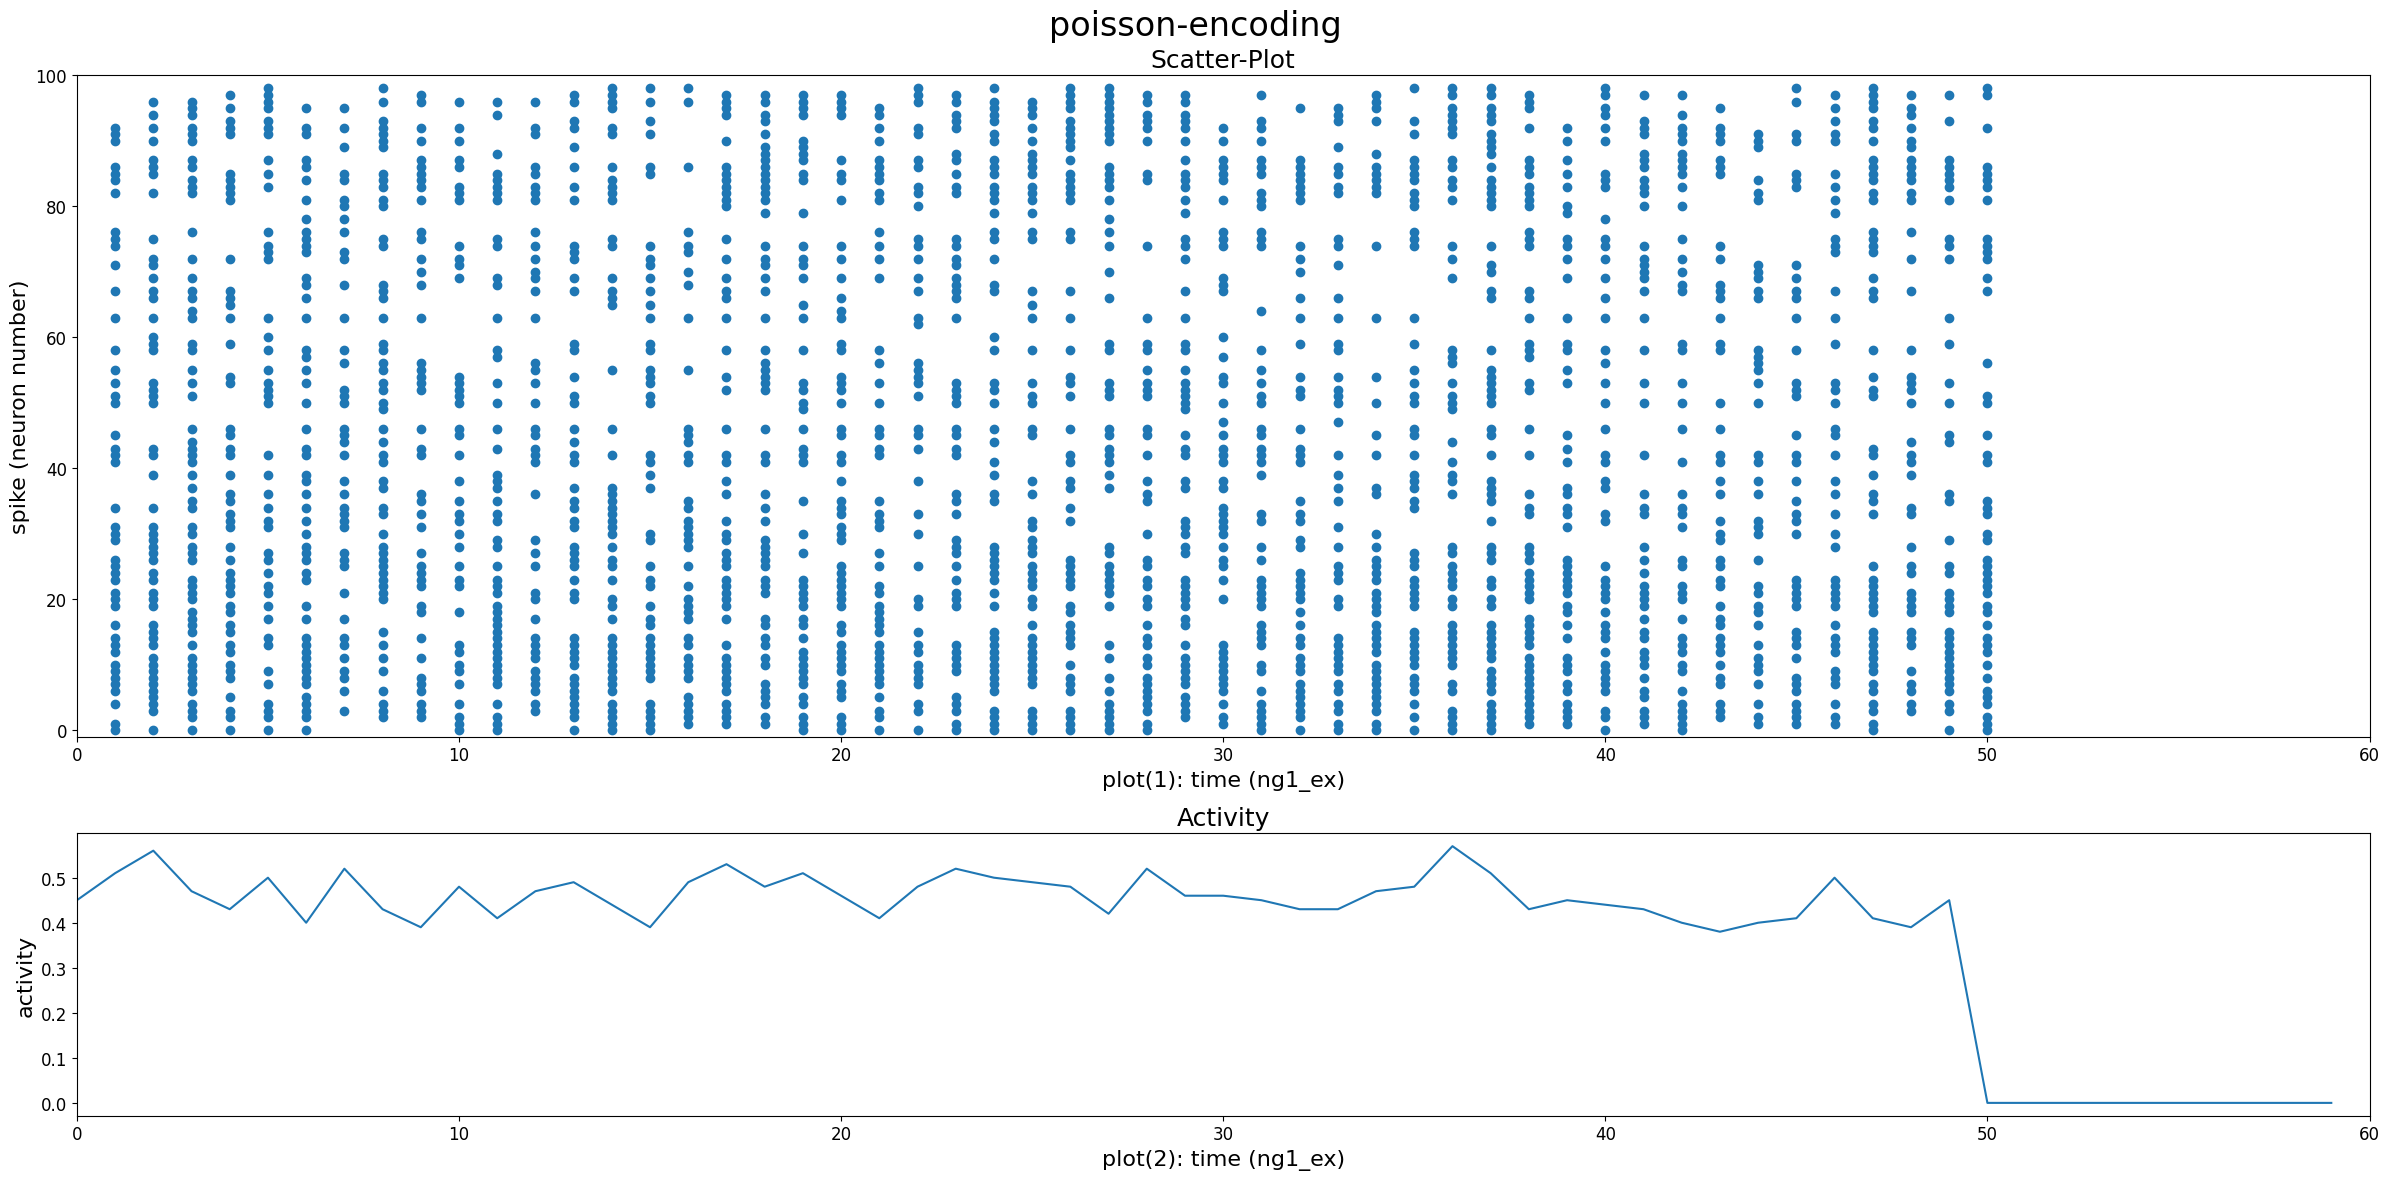

In [11]:
iteration = 60
net = part1(
    iteration=iteration,
    in_size=2,
    syn_model_ex_inh=syn.FullyConnected(j0=1.2, variation=50, tau=2),
    input_data=InputData.Encode(
        data=data1,
        range=255,
        time=50,
        method="poisson",
    ),
    title = "poisson-encoding"
)

-----------
    \begin{table}[htbp]
        \centering
        \begin{tabular}{||l|l||}
            \hline
            \textbf{Parameter}  & \textbf{Value} \\ \hline \hline \hline
    
            $input\_current$ & $no-current$ \\ \hline  
            $input\_model$ & $LIF$ \\ \hline 
            $input\_size$ & $100$ \\ \hline 
            $input\_time$ & $50$ \\ \hline 
            $rest\_time$ & $10$ \\ \hline 
            $duration\_time$ & $60$ \\ \hline 
            $iteration$ & $110$ \\ \hline 
            
        \end{tabular}
        \caption{Experiment Parameters related to figure number | part 1}
    \end{table}
    ------------
theta: 2, tau: 6.578166246197594, epsilon: 0.001
theta: 2, tau: 6.578166246197594, epsilon: 0.001
110xBatch: 1/1 (100%) 82.759ms


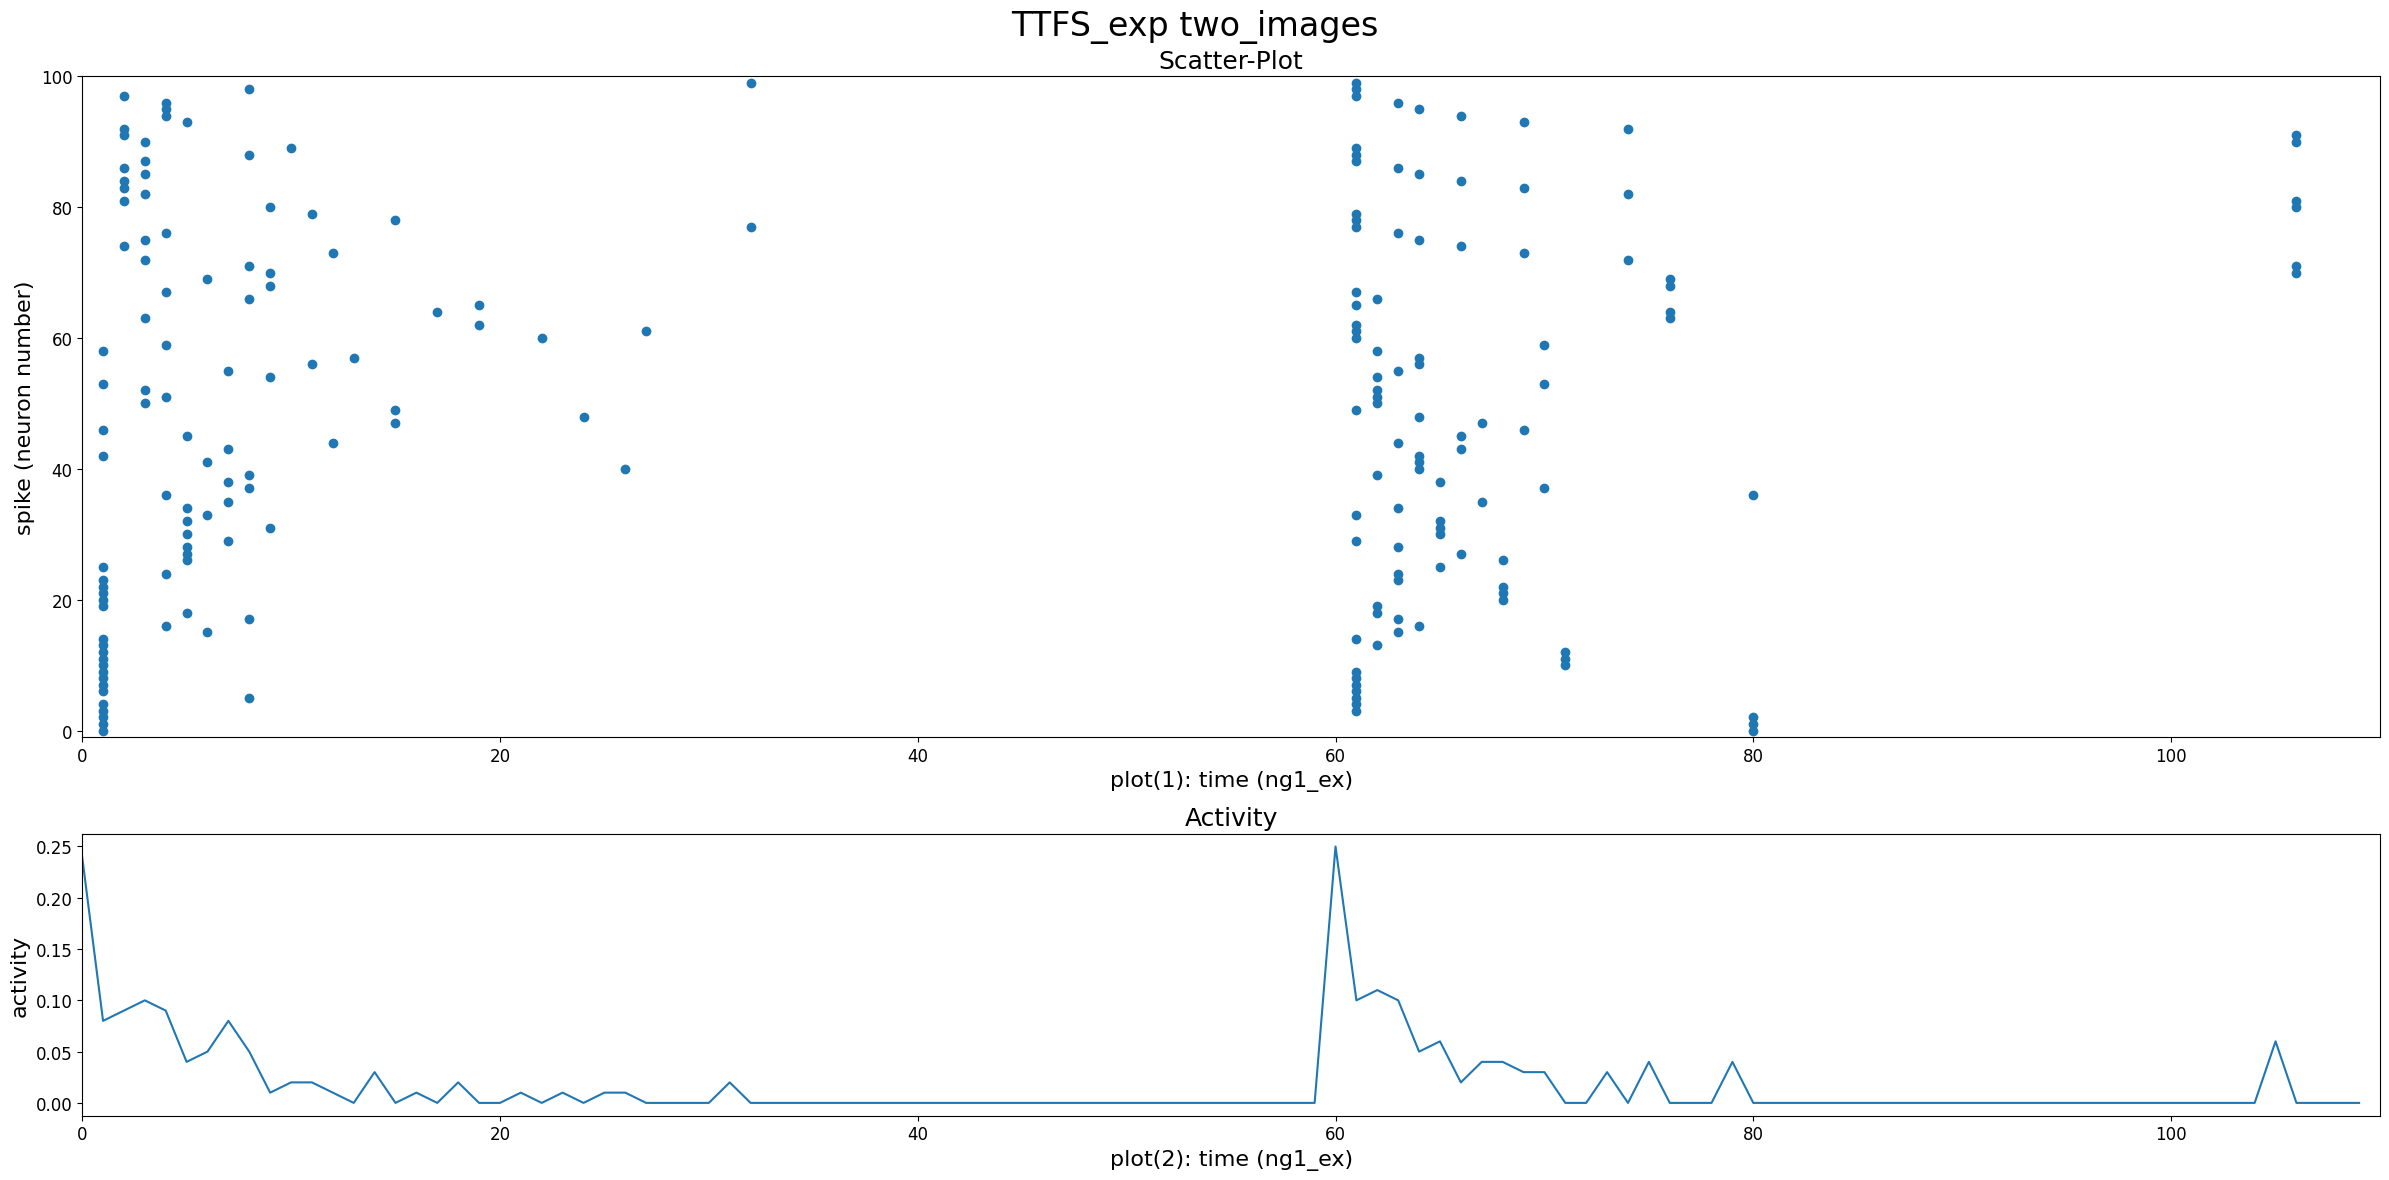

In [12]:
iteration = 110
net = part1(
    iteration=iteration,
    in_size=2,
    syn_model_ex_inh=syn.FullyConnected(j0=1.2, variation=50, tau=2),
    input_data=InputData.Encode(
        data=data0,
        range=255,
        time=50,
        method="TTFS_exp",
    ),
    title = "TTFS_exp two_images"
)

-----------
    \begin{table}[htbp]
        \centering
        \begin{tabular}{||l|l||}
            \hline
            \textbf{Parameter}  & \textbf{Value} \\ \hline \hline \hline
    
            $input\_current$ & $no-current$ \\ \hline  
            $input\_model$ & $LIF$ \\ \hline 
            $input\_size$ & $100$ \\ \hline 
            $input\_time$ & $50$ \\ \hline 
            $rest\_time$ & $10$ \\ \hline 
            $duration\_time$ & $60$ \\ \hline 
            $iteration$ & $110$ \\ \hline 
            
        \end{tabular}
        \caption{Experiment Parameters related to figure number | part 1}
    \end{table}
    ------------
110xBatch: 1/1 (100%) 63.373ms


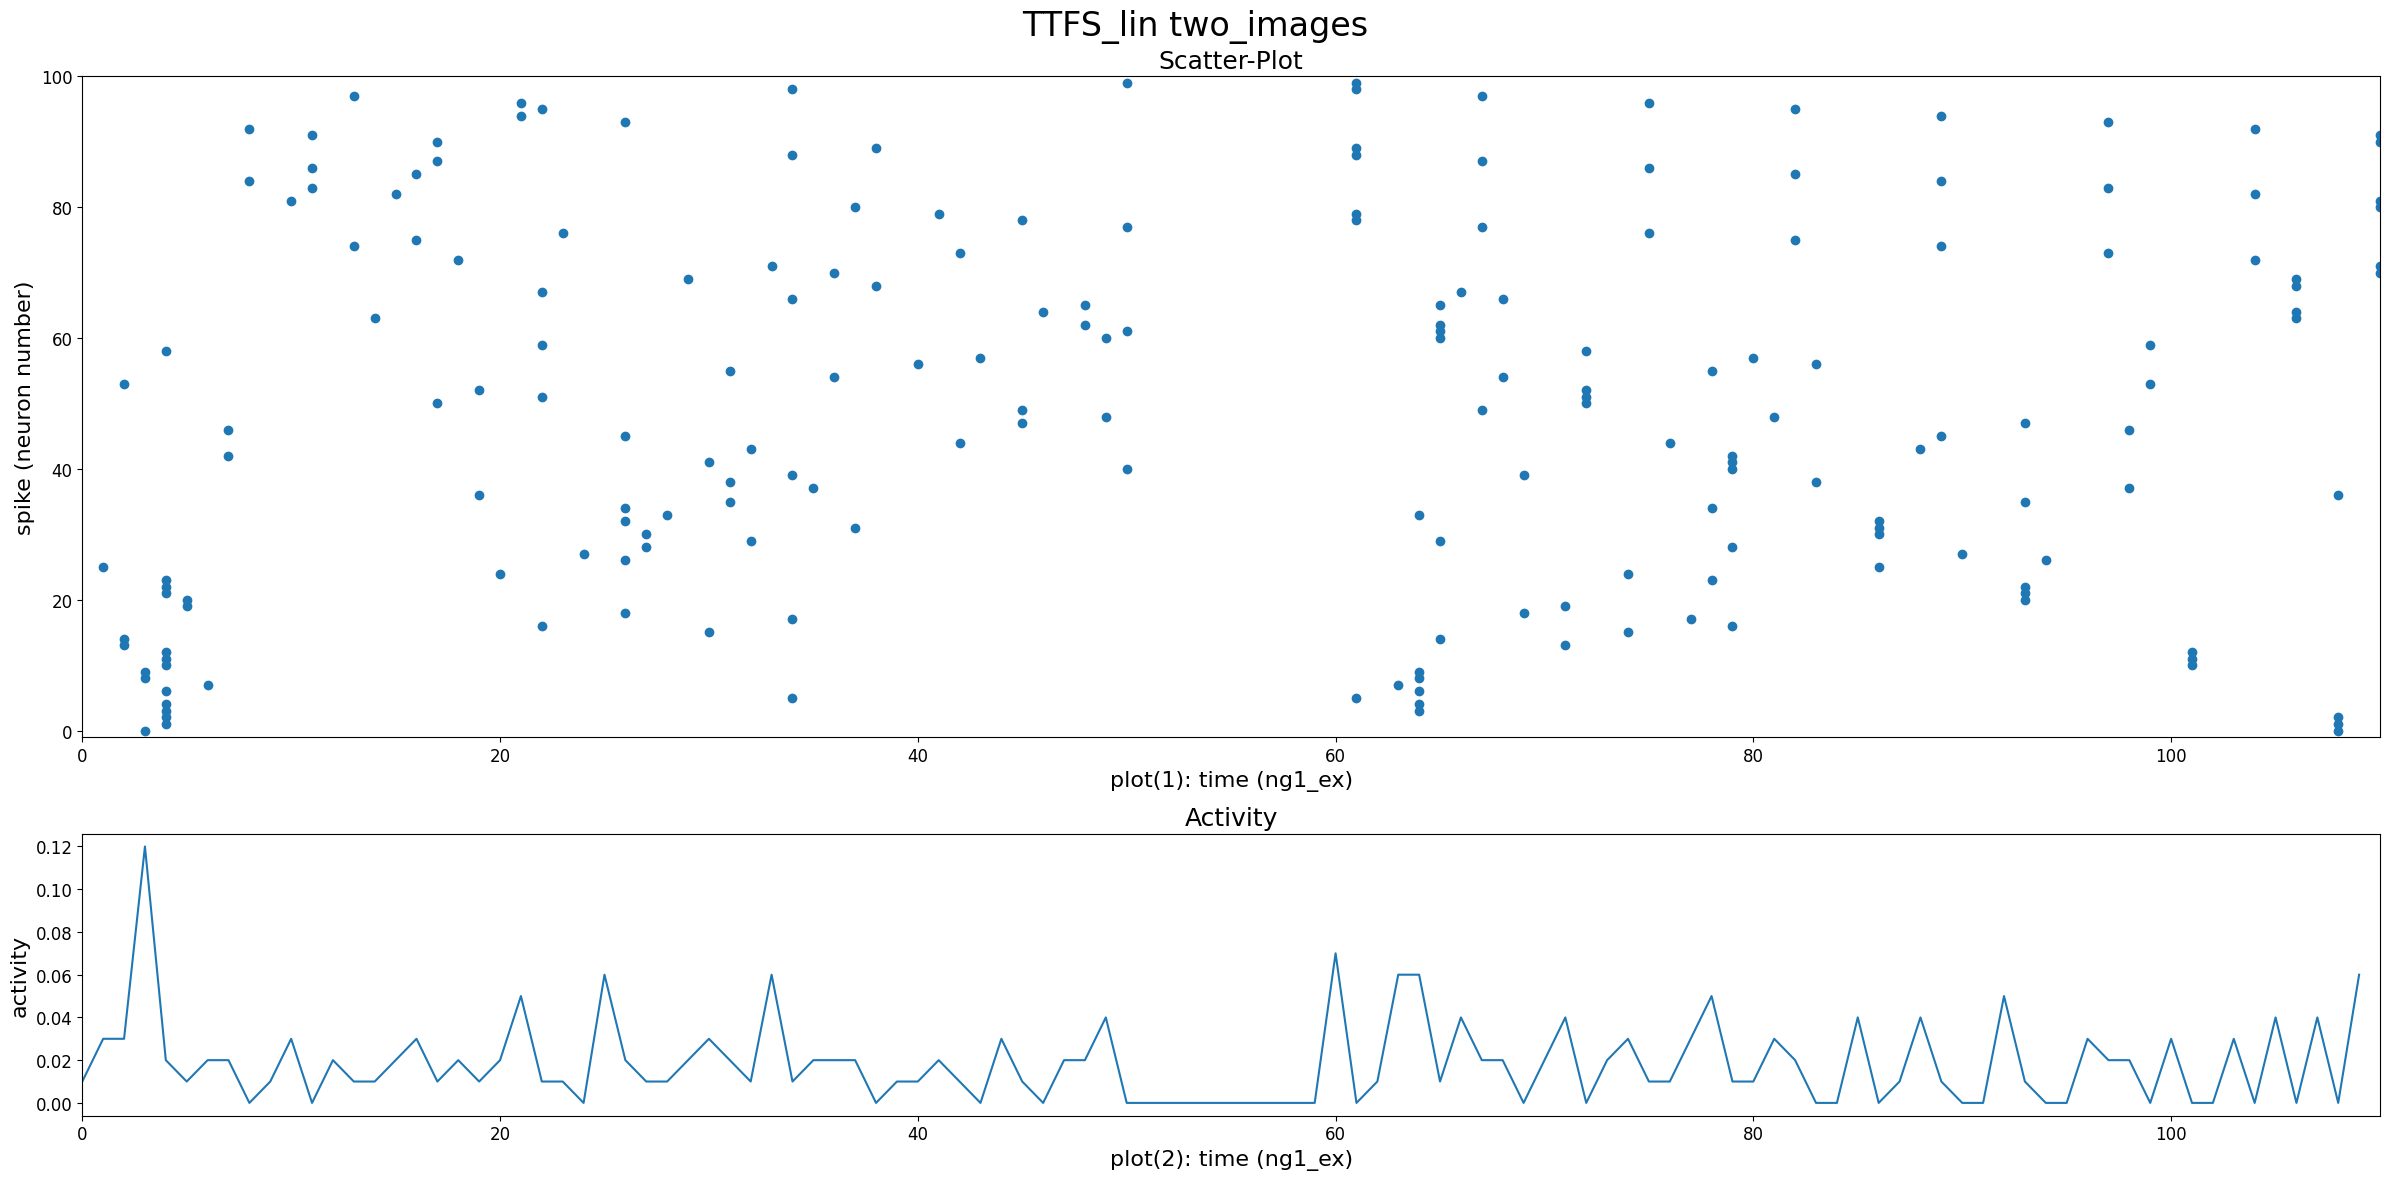

In [13]:
iteration = 110
net = part1(
    iteration=iteration,
    in_size=2,
    syn_model_ex_inh=syn.FullyConnected(j0=1.2, variation=50, tau=2),
    input_data=InputData.Encode(
        data=data0,
        range=255,
        time=50,
        method="TTFS_lin",
    ),
    title = "TTFS_lin two_images"
)

-----------
    \begin{table}[htbp]
        \centering
        \begin{tabular}{||l|l||}
            \hline
            \textbf{Parameter}  & \textbf{Value} \\ \hline \hline \hline
    
            $input\_current$ & $no-current$ \\ \hline  
            $input\_model$ & $LIF$ \\ \hline 
            $input\_size$ & $100$ \\ \hline 
            $input\_time$ & $50$ \\ \hline 
            $rest\_time$ & $10$ \\ \hline 
            $duration\_time$ & $60$ \\ \hline 
            $iteration$ & $110$ \\ \hline 
            
        \end{tabular}
        \caption{Experiment Parameters related to figure number | part 1}
    \end{table}
    ------------
110xBatch: 1/1 (100%) 74.097ms


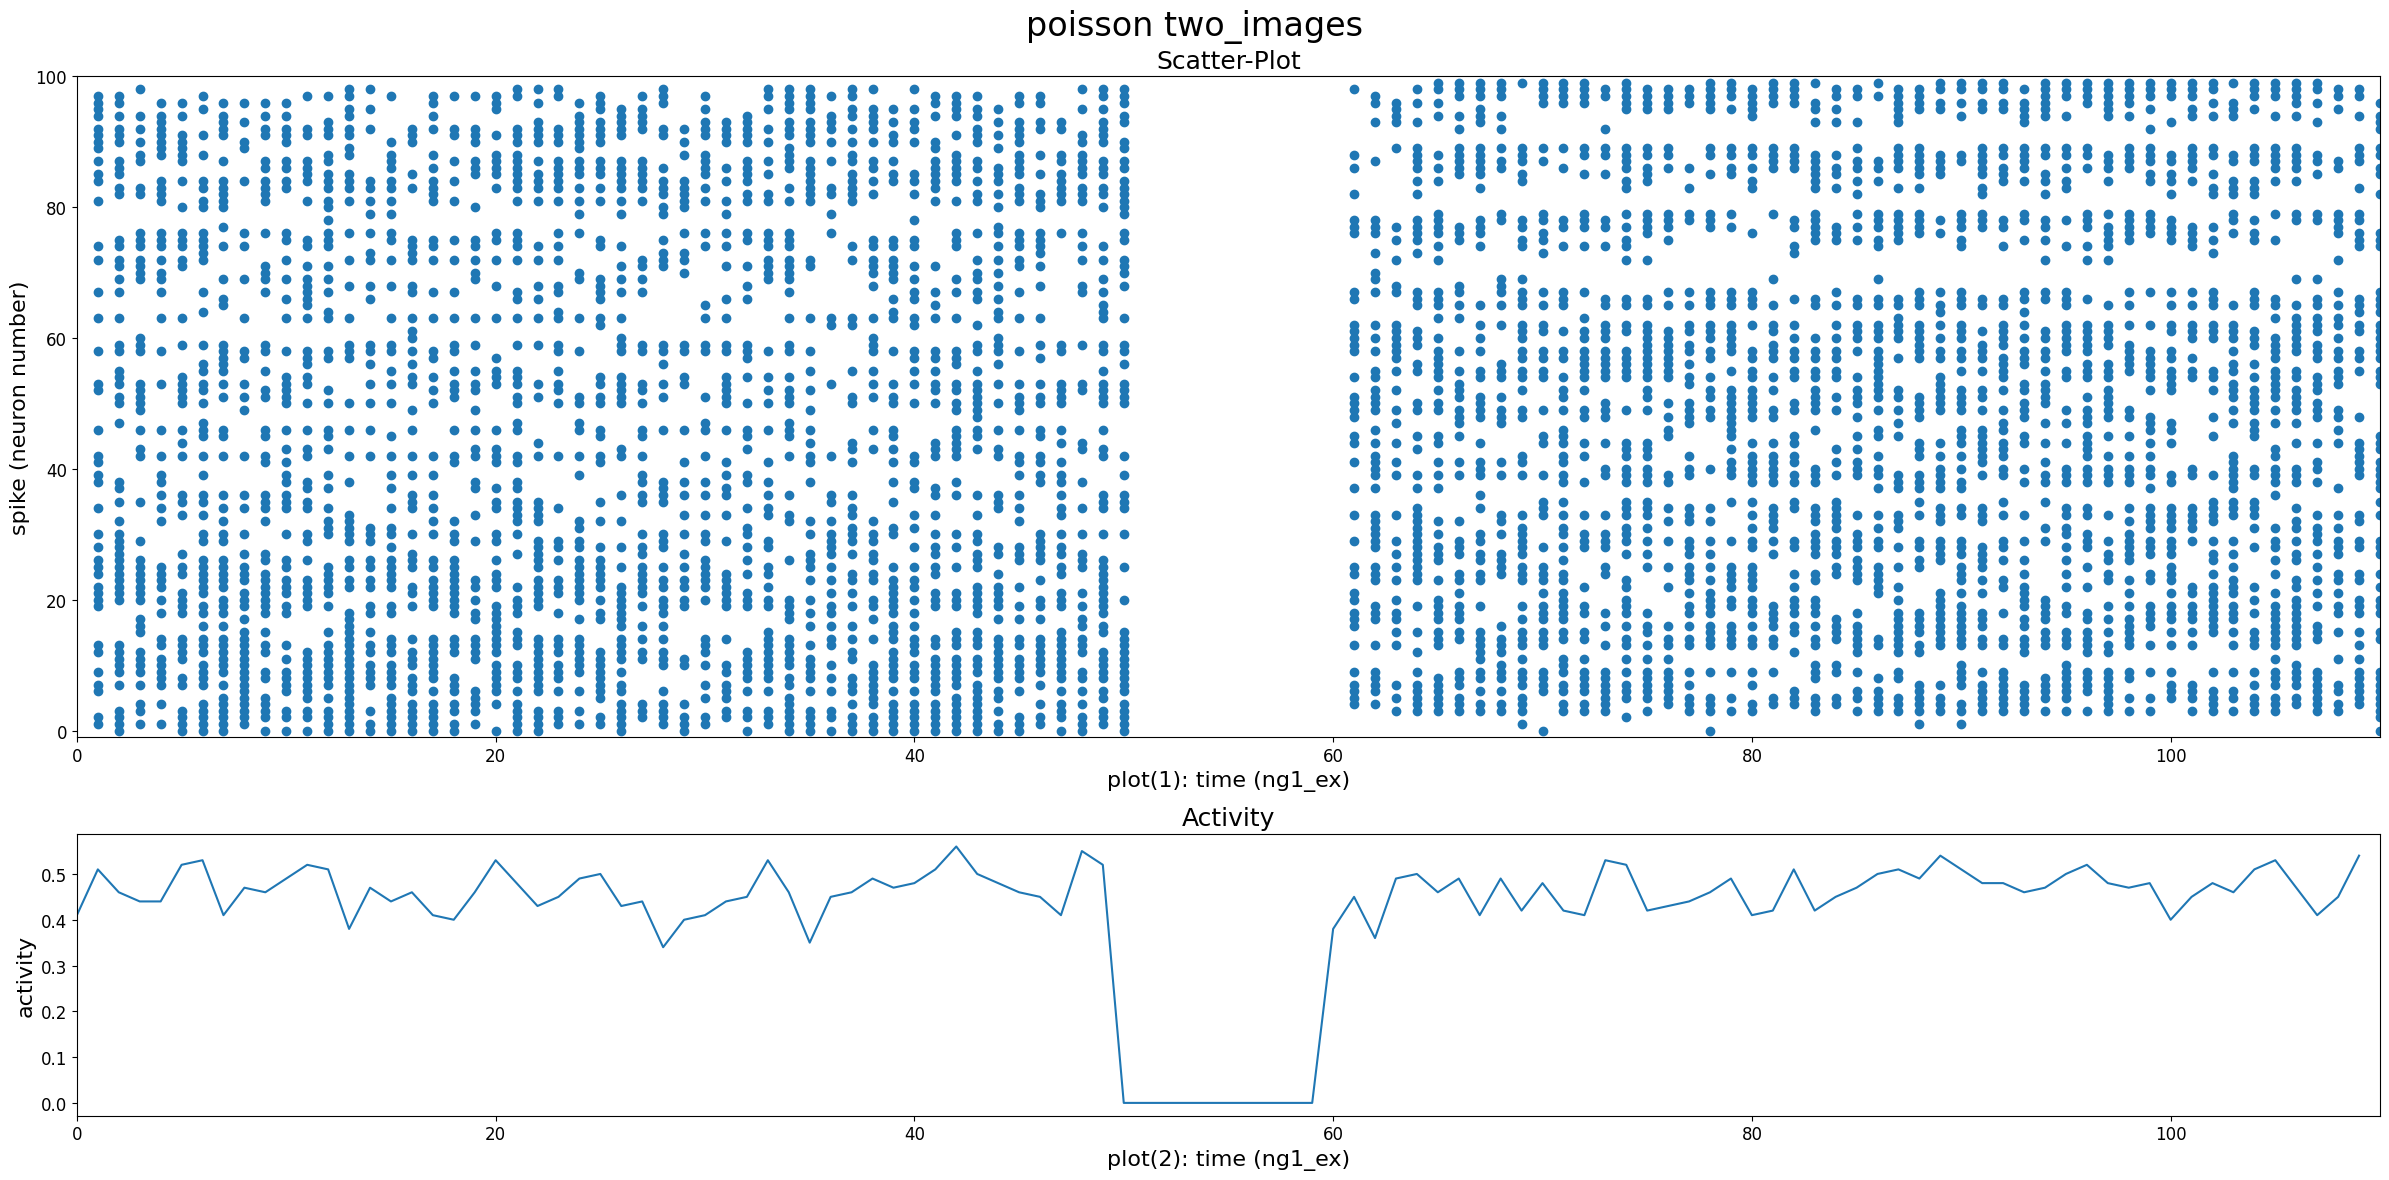

In [14]:
iteration = 110
net = part1(
    iteration=iteration,
    in_size=2,
    syn_model_ex_inh=syn.FullyConnected(j0=1.2, variation=50, tau=2),
    input_data=InputData.Encode(
        data=data0,
        range=255,
        time=50,
        method="poisson",
    ),
    title = "poisson two_images"
)

-----------
    \begin{table}[htbp]
        \centering
        \begin{tabular}{||l|l||}
            \hline
            \textbf{Parameter}  & \textbf{Value} \\ \hline \hline \hline
    
            $input\_current$ & $no-current$ \\ \hline  
            $input\_model$ & $LIF$ \\ \hline 
            $input\_size$ & $5$ \\ \hline 
            $input\_time$ & $50$ \\ \hline 
            $rest\_time$ & $10$ \\ \hline 
            $duration\_time$ & $60$ \\ \hline 
            $iteration$ & $60$ \\ \hline 
            
        \end{tabular}
        \caption{Experiment Parameters related to figure number | part 1}
    \end{table}
    ------------
theta: 2, tau: 6.578166246197594, epsilon: 0.001
60xBatch: 1/1 (100%) 36.453ms


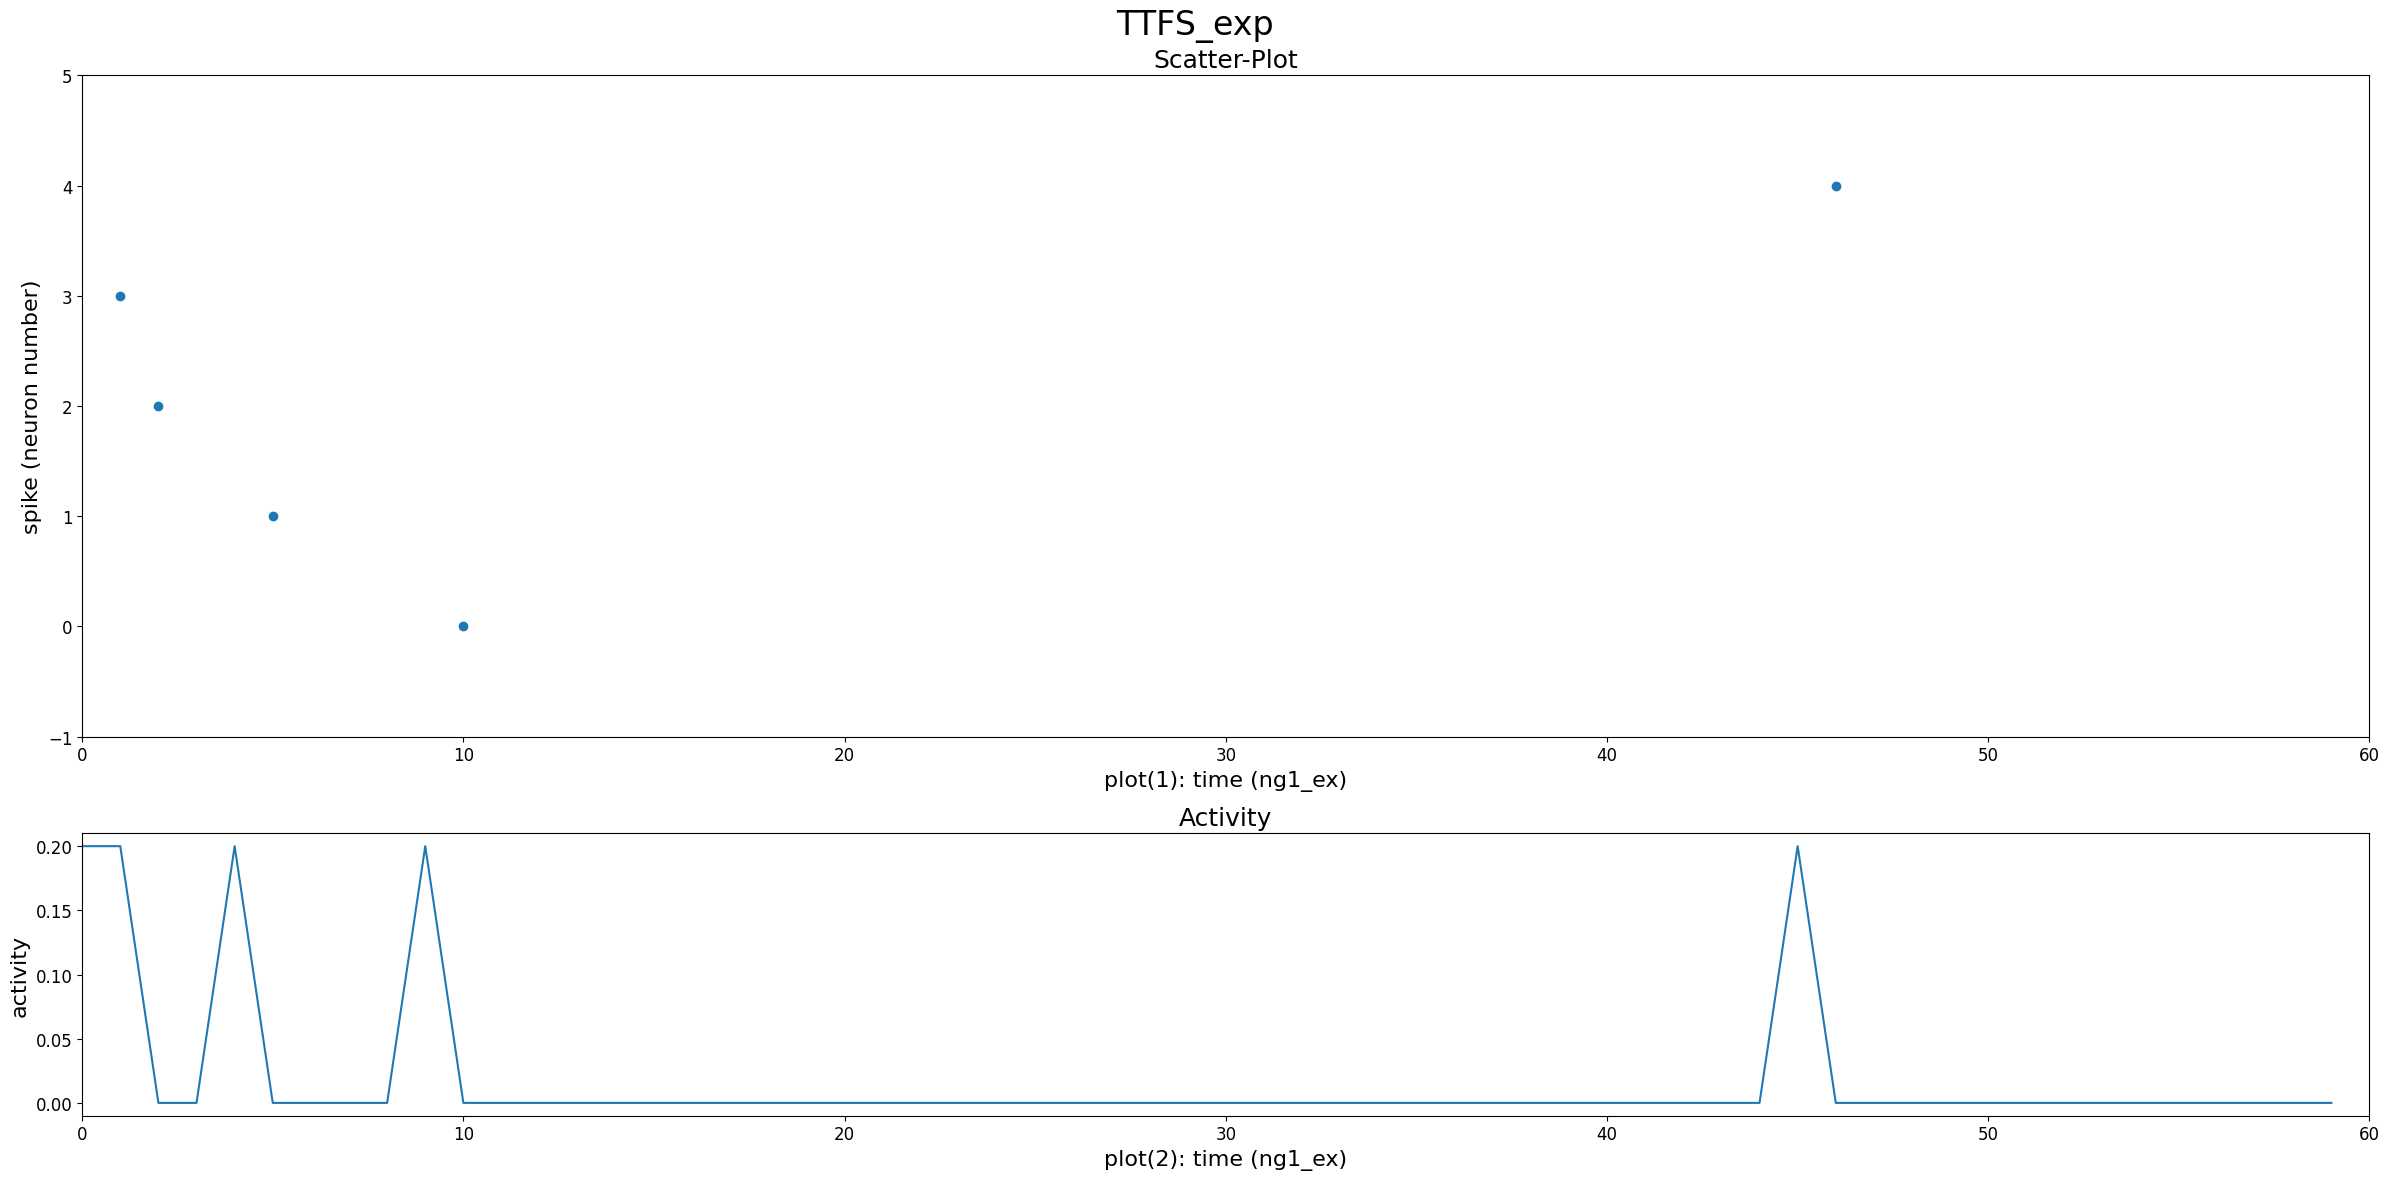

In [15]:
iteration = 60
net = part1(
    iteration=iteration,
    in_size=2,
    syn_model_ex_inh=syn.FullyConnected(j0=1.2, variation=50, tau=2),
    input_data=InputData.Encode(
        data=data3,
        # range=255,
        time=50,
        method="TTFS_exp",
    ),
    title = "TTFS_exp"
)

-----------
    \begin{table}[htbp]
        \centering
        \begin{tabular}{||l|l||}
            \hline
            \textbf{Parameter}  & \textbf{Value} \\ \hline \hline \hline
    
            $input\_current$ & $no-current$ \\ \hline  
            $input\_model$ & $LIF$ \\ \hline 
            $input\_size$ & $5$ \\ \hline 
            $input\_time$ & $50$ \\ \hline 
            $rest\_time$ & $10$ \\ \hline 
            $duration\_time$ & $60$ \\ \hline 
            $iteration$ & $60$ \\ \hline 
            
        \end{tabular}
        \caption{Experiment Parameters related to figure number | part 1}
    \end{table}
    ------------
60xBatch: 1/1 (100%) 36.273ms


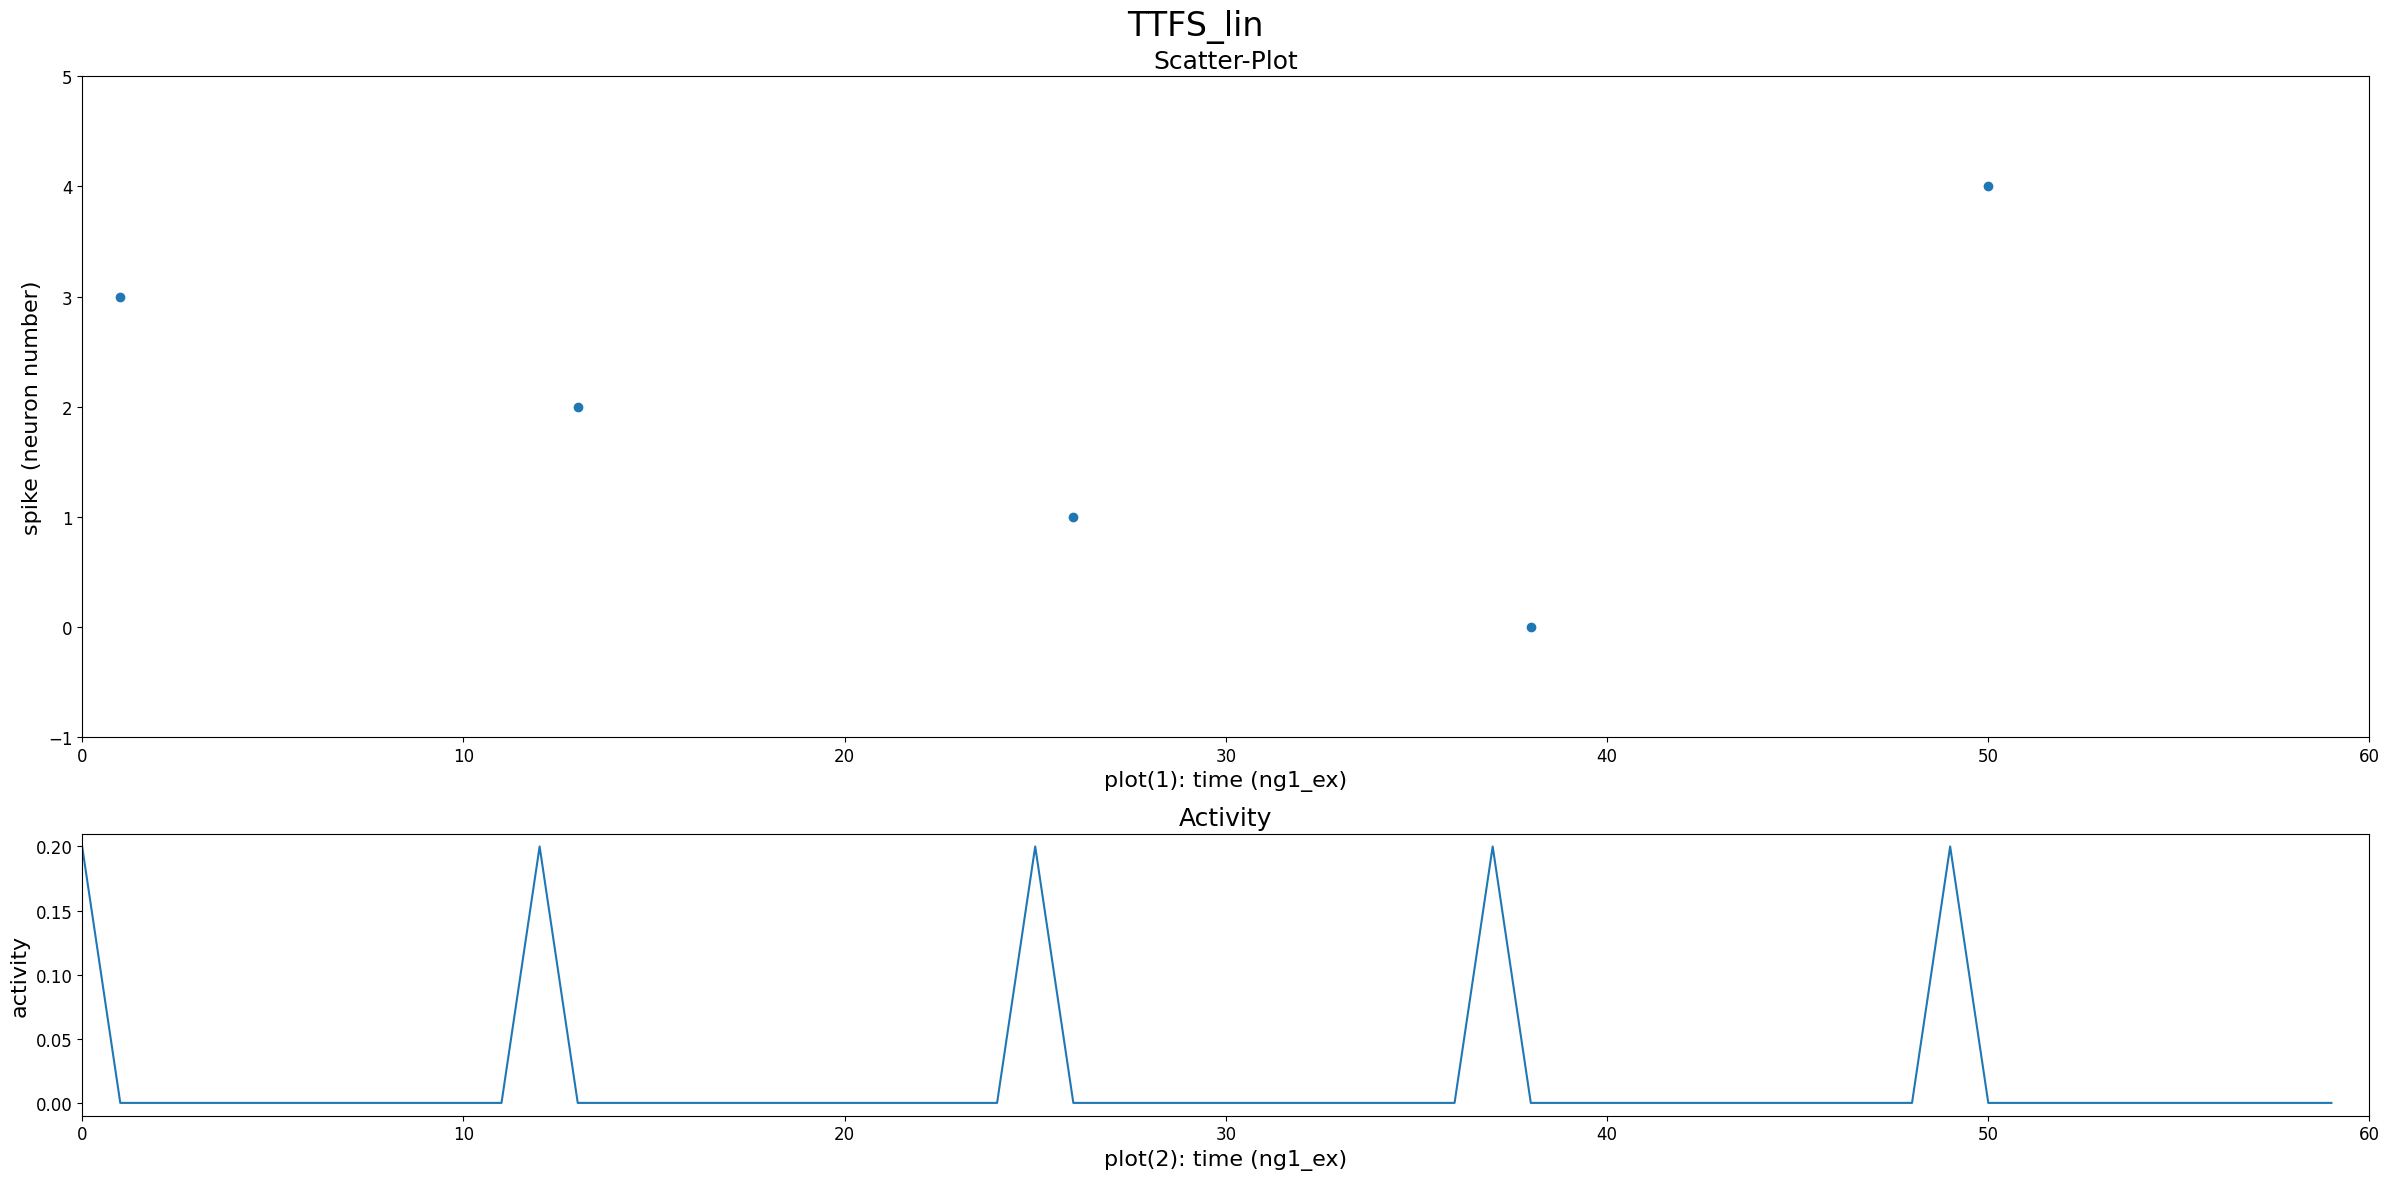

In [16]:
iteration = 60
net = part1(
    iteration=iteration,
    in_size=2,
    syn_model_ex_inh=syn.FullyConnected(j0=1.2, variation=50, tau=2),
    input_data=InputData.Encode(
        data=data3,
        # range=255,
        time=50,
        method="TTFS_lin",
    ),
    title = "TTFS_lin"
)

-----------
    \begin{table}[htbp]
        \centering
        \begin{tabular}{||l|l||}
            \hline
            \textbf{Parameter}  & \textbf{Value} \\ \hline \hline \hline
    
            $input\_current$ & $no-current$ \\ \hline  
            $input\_model$ & $LIF$ \\ \hline 
            $input\_size$ & $5$ \\ \hline 
            $input\_time$ & $50$ \\ \hline 
            $rest\_time$ & $10$ \\ \hline 
            $duration\_time$ & $60$ \\ \hline 
            $iteration$ & $60$ \\ \hline 
            
        \end{tabular}
        \caption{Experiment Parameters related to figure number | part 1}
    \end{table}
    ------------
60xBatch: 1/1 (100%) 35.678ms


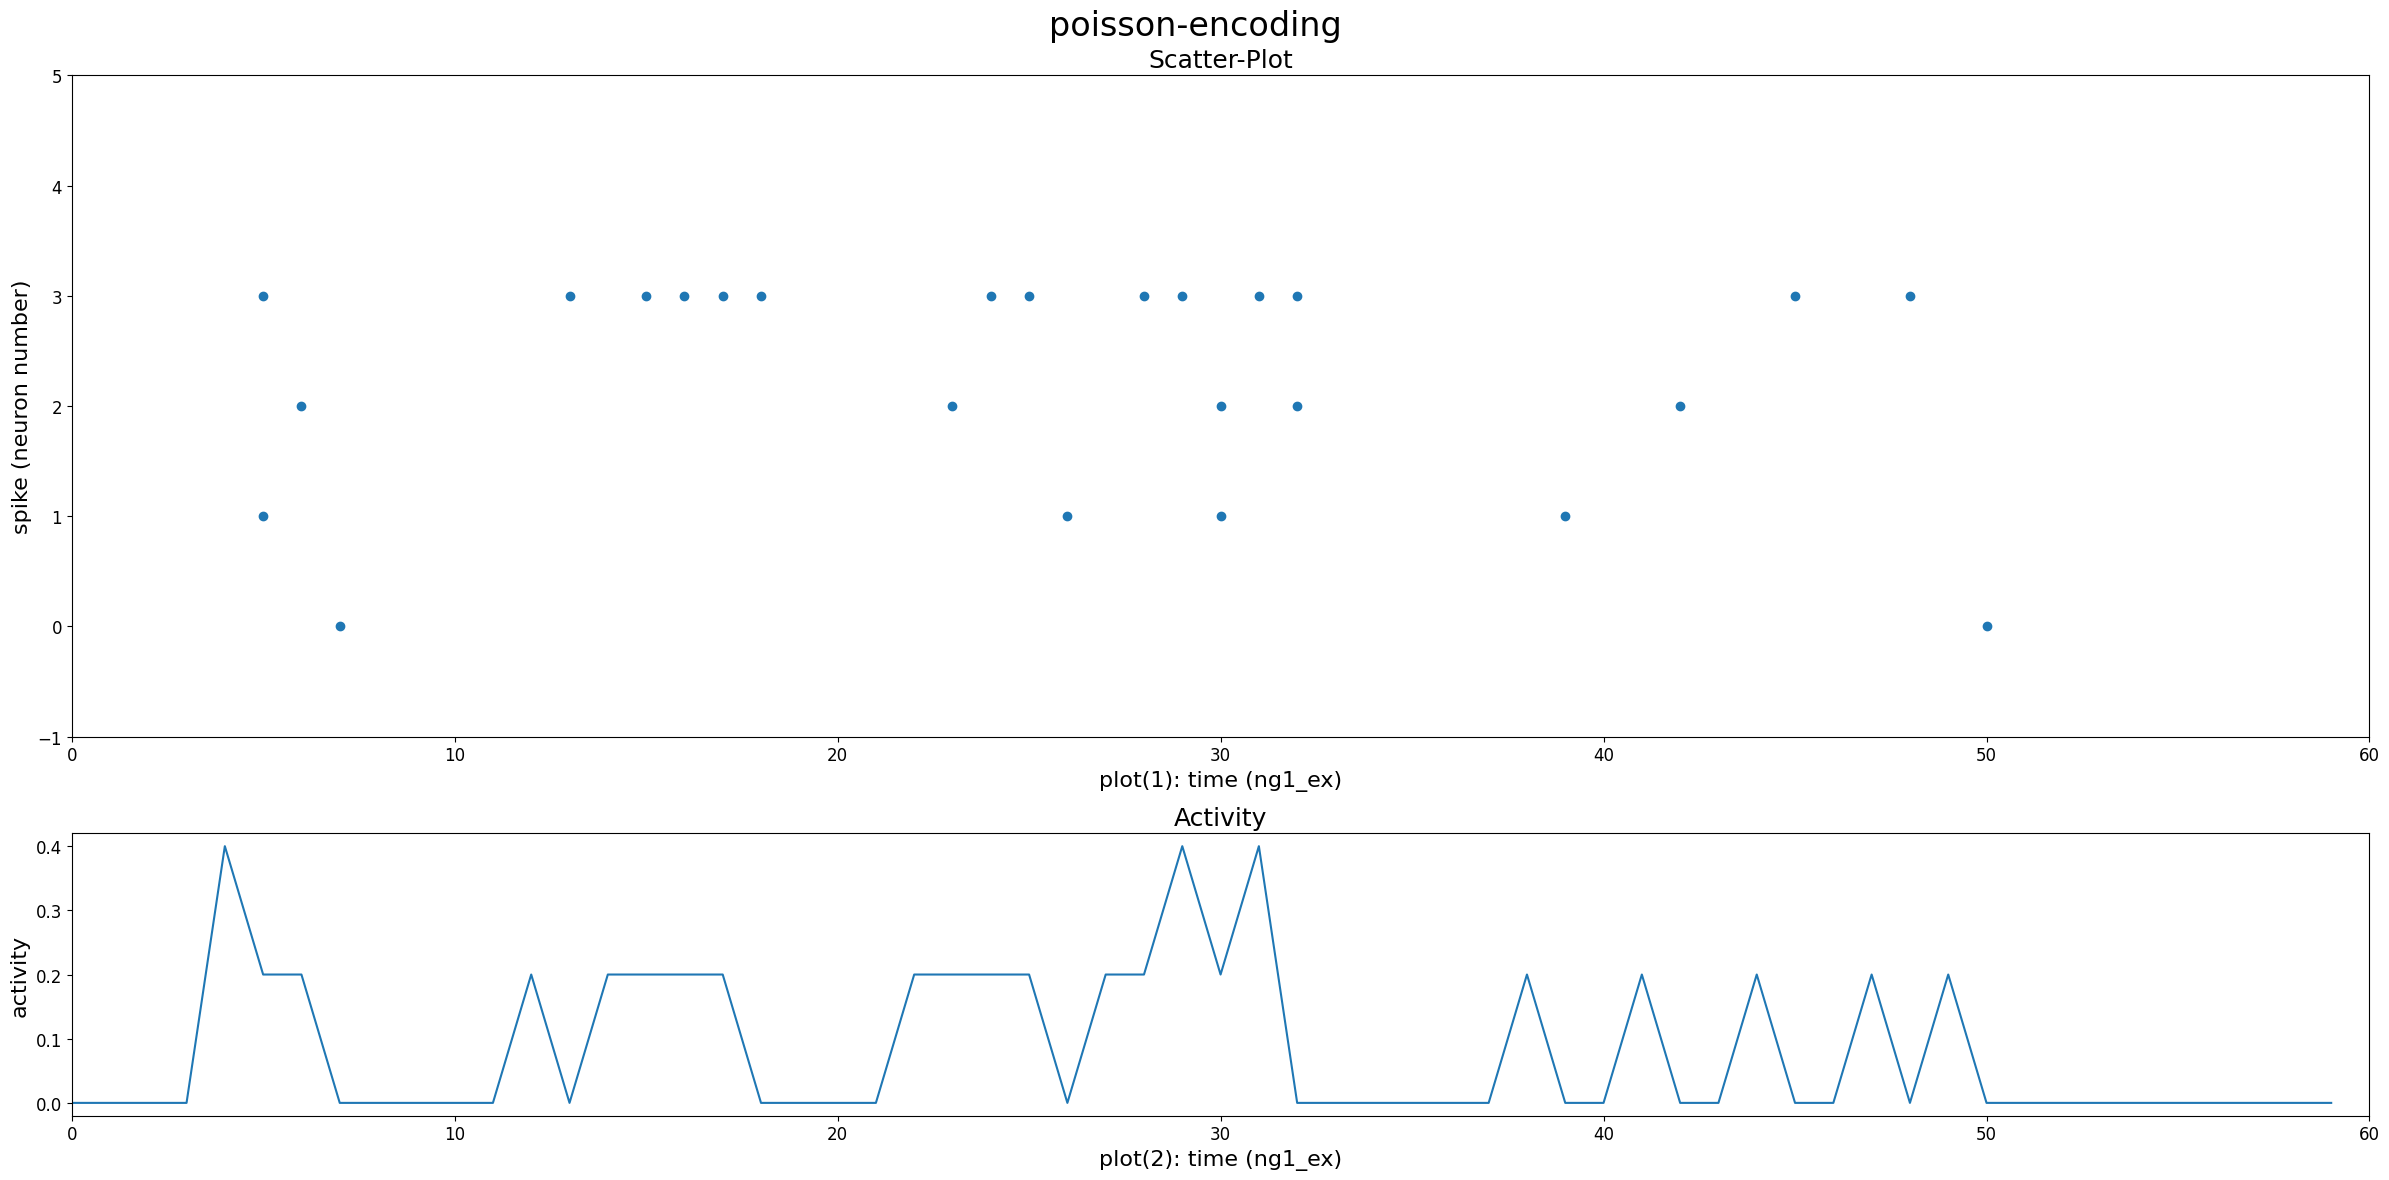

In [17]:
iteration = 60
net = part1(
    iteration=iteration,
    in_size=2,
    syn_model_ex_inh=syn.FullyConnected(j0=1.2, variation=50, tau=2),
    input_data=InputData.Encode(
        data=data3,
        range=255,
        time=50,
        method="poisson",
    ),
    title = "poisson-encoding"
)

-----------
    \begin{table}[htbp]
        \centering
        \begin{tabular}{||l|l||}
            \hline
            \textbf{Parameter}  & \textbf{Value} \\ \hline \hline \hline
    
            $input\_current$ & $no-current$ \\ \hline  
            $input\_model$ & $LIF$ \\ \hline 
            $input\_size$ & $10$ \\ \hline 
            $input\_time$ & $50$ \\ \hline 
            $rest\_time$ & $10$ \\ \hline 
            $duration\_time$ & $60$ \\ \hline 
            $iteration$ & $11$ \\ \hline 
            
        \end{tabular}
        \caption{Experiment Parameters related to figure number | part 1}
    \end{table}
    ------------
11xBatch: 1/1 (100%) 9.438ms


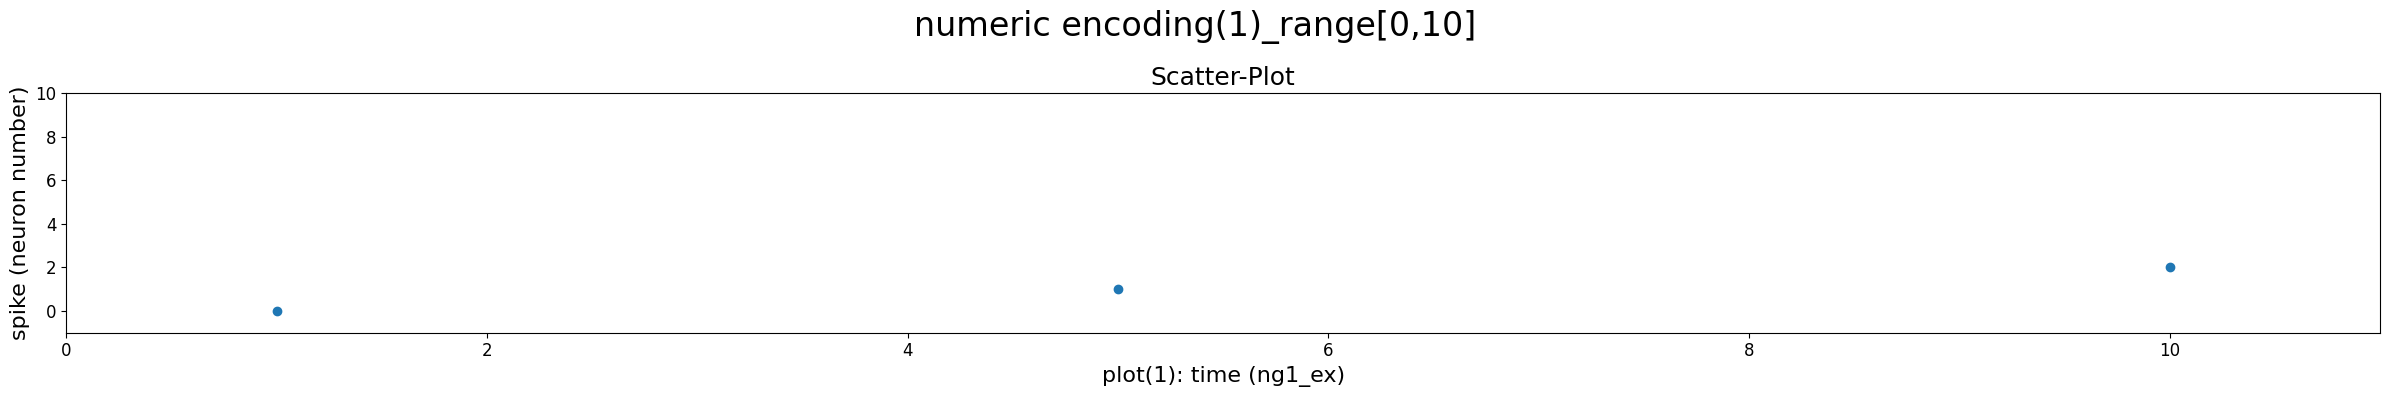

In [18]:
iteration = 11
net = part1(
    iteration=iteration,
    ex_size=10,
    in_size=2,
    syn_model_ex_inh=syn.FullyConnected(j0=1.2, variation=50, tau=2),
    input_data=InputData.Number(
        data=1,
        time=10,
    ),
    print_activity=False,
    title = "numeric encoding(1)_range[0,10]"

)

-----------
    \begin{table}[htbp]
        \centering
        \begin{tabular}{||l|l||}
            \hline
            \textbf{Parameter}  & \textbf{Value} \\ \hline \hline \hline
    
            $input\_current$ & $no-current$ \\ \hline  
            $input\_model$ & $LIF$ \\ \hline 
            $input\_size$ & $10$ \\ \hline 
            $input\_time$ & $50$ \\ \hline 
            $rest\_time$ & $10$ \\ \hline 
            $duration\_time$ & $60$ \\ \hline 
            $iteration$ & $11$ \\ \hline 
            
        \end{tabular}
        \caption{Experiment Parameters related to figure number | part 1}
    \end{table}
    ------------
11xBatch: 1/1 (100%) 7.955ms


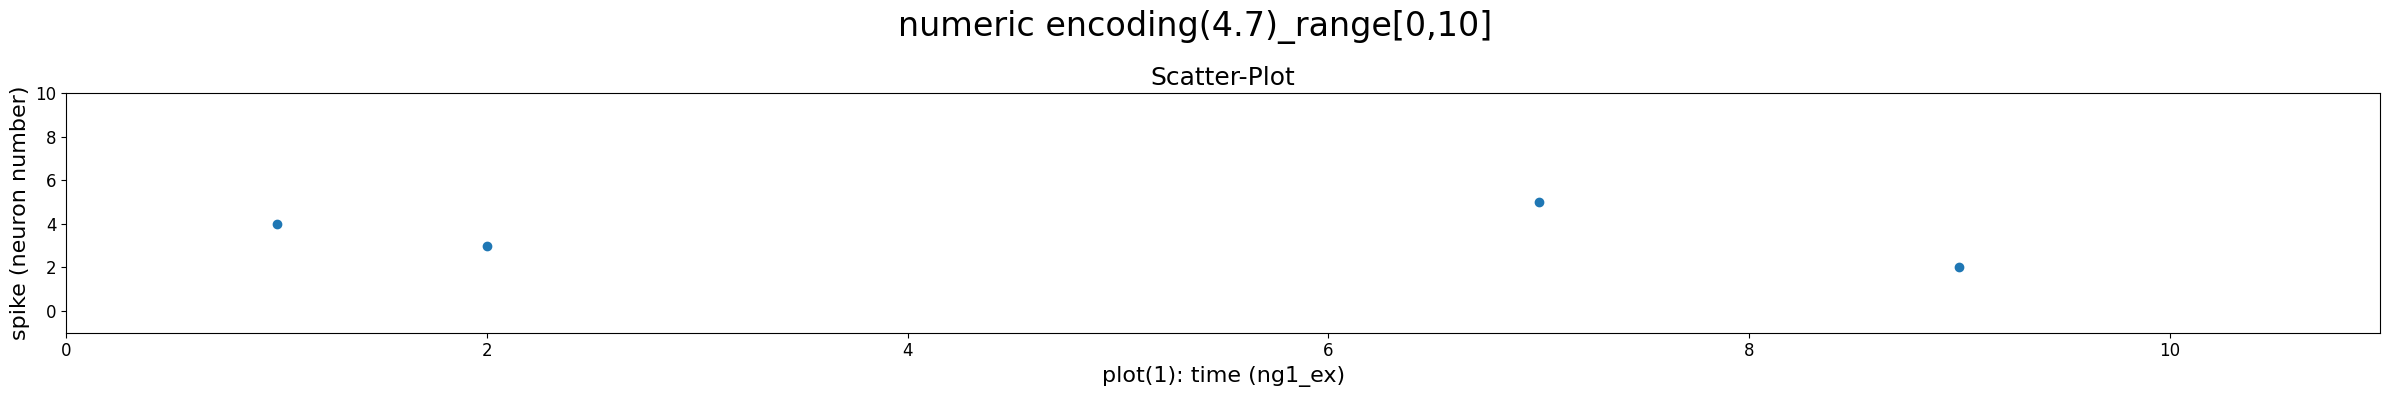

In [19]:
iteration = 11
net = part1(
    iteration=iteration,
    ex_size=10,
    in_size=2,
    syn_model_ex_inh=syn.FullyConnected(j0=1.2, variation=50, tau=2),
    input_data=InputData.Number(
        data=4.7,
        time=10,
    ),
    print_activity=False,

    title = "numeric encoding(4.7)_range[0,10]"

)

-----------
    \begin{table}[htbp]
        \centering
        \begin{tabular}{||l|l||}
            \hline
            \textbf{Parameter}  & \textbf{Value} \\ \hline \hline \hline
    
            $input\_current$ & $no-current$ \\ \hline  
            $input\_model$ & $LIF$ \\ \hline 
            $input\_size$ & $10$ \\ \hline 
            $input\_time$ & $50$ \\ \hline 
            $rest\_time$ & $10$ \\ \hline 
            $duration\_time$ & $60$ \\ \hline 
            $iteration$ & $11$ \\ \hline 
            
        \end{tabular}
        \caption{Experiment Parameters related to figure number | part 1}
    \end{table}
    ------------
11xBatch: 1/1 (100%) 7.561ms


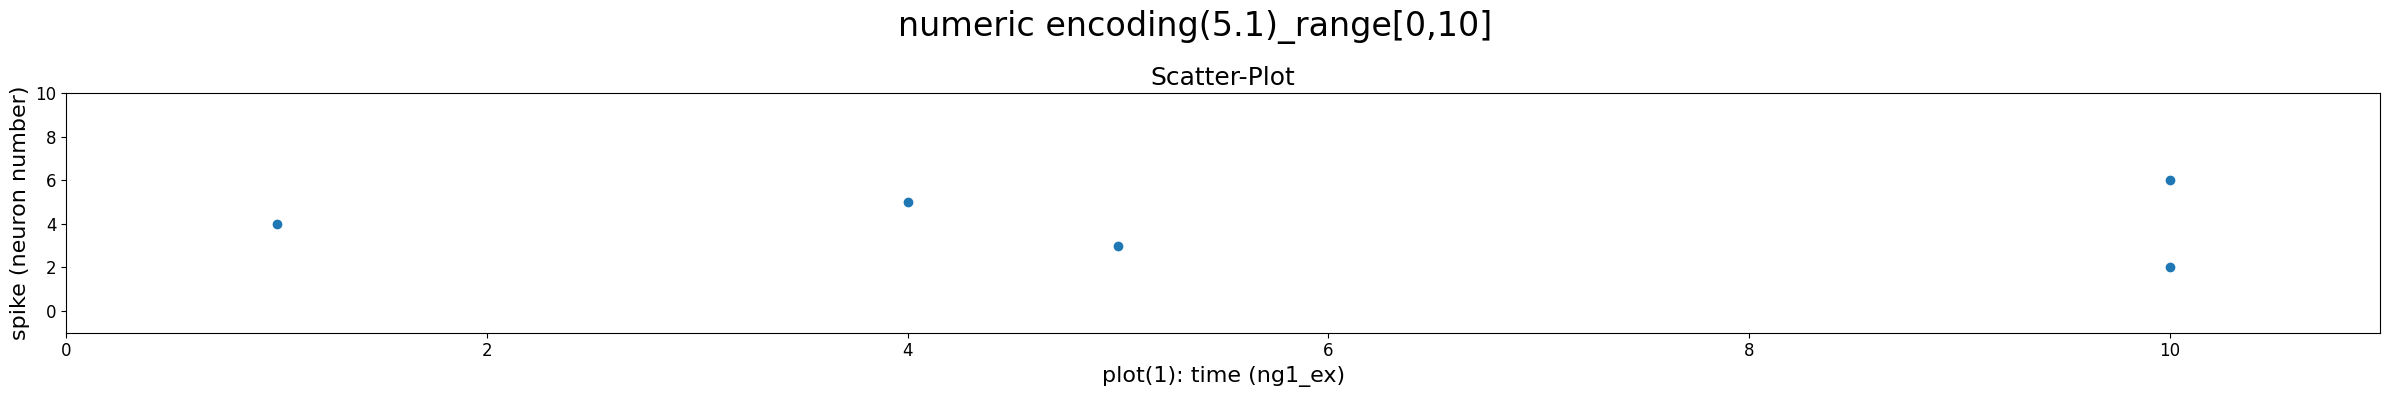

In [20]:
iteration = 11
net = part1(
    iteration=iteration,
    ex_size=10,
    in_size=2,
    syn_model_ex_inh=syn.FullyConnected(j0=1.2, variation=50, tau=2),
    input_data=InputData.Number(
        data=5.1,
        time=10,
    ),
    print_activity=False,
    title = "numeric encoding(5.1)_range[0,10]"

)

-----------
    \begin{table}[htbp]
        \centering
        \begin{tabular}{||l|l||}
            \hline
            \textbf{Parameter}  & \textbf{Value} \\ \hline \hline \hline
    
            $input\_current$ & $no-current$ \\ \hline  
            $input\_model$ & $LIF$ \\ \hline 
            $input\_size$ & $10$ \\ \hline 
            $input\_time$ & $50$ \\ \hline 
            $rest\_time$ & $10$ \\ \hline 
            $duration\_time$ & $60$ \\ \hline 
            $iteration$ & $11$ \\ \hline 
            
        \end{tabular}
        \caption{Experiment Parameters related to figure number | part 1}
    \end{table}
    ------------
11xBatch: 1/1 (100%) 7.939ms


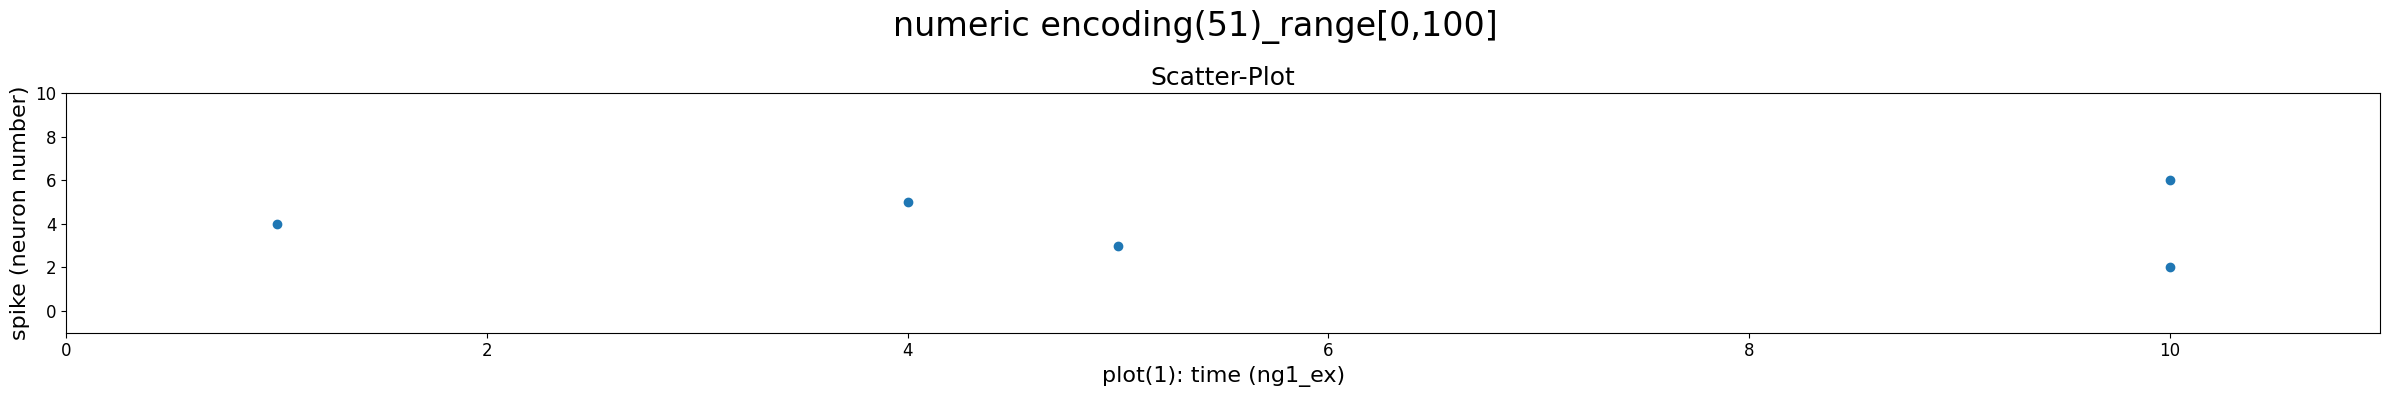

In [21]:
iteration = 11
net = part1(
    iteration=iteration,
    ex_size=10,
    in_size=2,
    syn_model_ex_inh=syn.FullyConnected(j0=1.2, variation=50, tau=2),
    input_data=InputData.Number(
        data=51,
        range=[0,100],
        time=10,
    ),
    print_activity=False,
    title = "numeric encoding(51)_range[0,100]"

)

-----------
    \begin{table}[htbp]
        \centering
        \begin{tabular}{||l|l||}
            \hline
            \textbf{Parameter}  & \textbf{Value} \\ \hline \hline \hline
    
            $input\_current$ & $no-current$ \\ \hline  
            $input\_model$ & $LIF$ \\ \hline 
            $input\_size$ & $5$ \\ \hline 
            $input\_time$ & $50$ \\ \hline 
            $rest\_time$ & $10$ \\ \hline 
            $duration\_time$ & $60$ \\ \hline 
            $iteration$ & $60$ \\ \hline 
            
        \end{tabular}
        \caption{Experiment Parameters related to figure number | part 1}
    \end{table}
    ------------
60xBatch: 1/1 (100%) 36.962ms


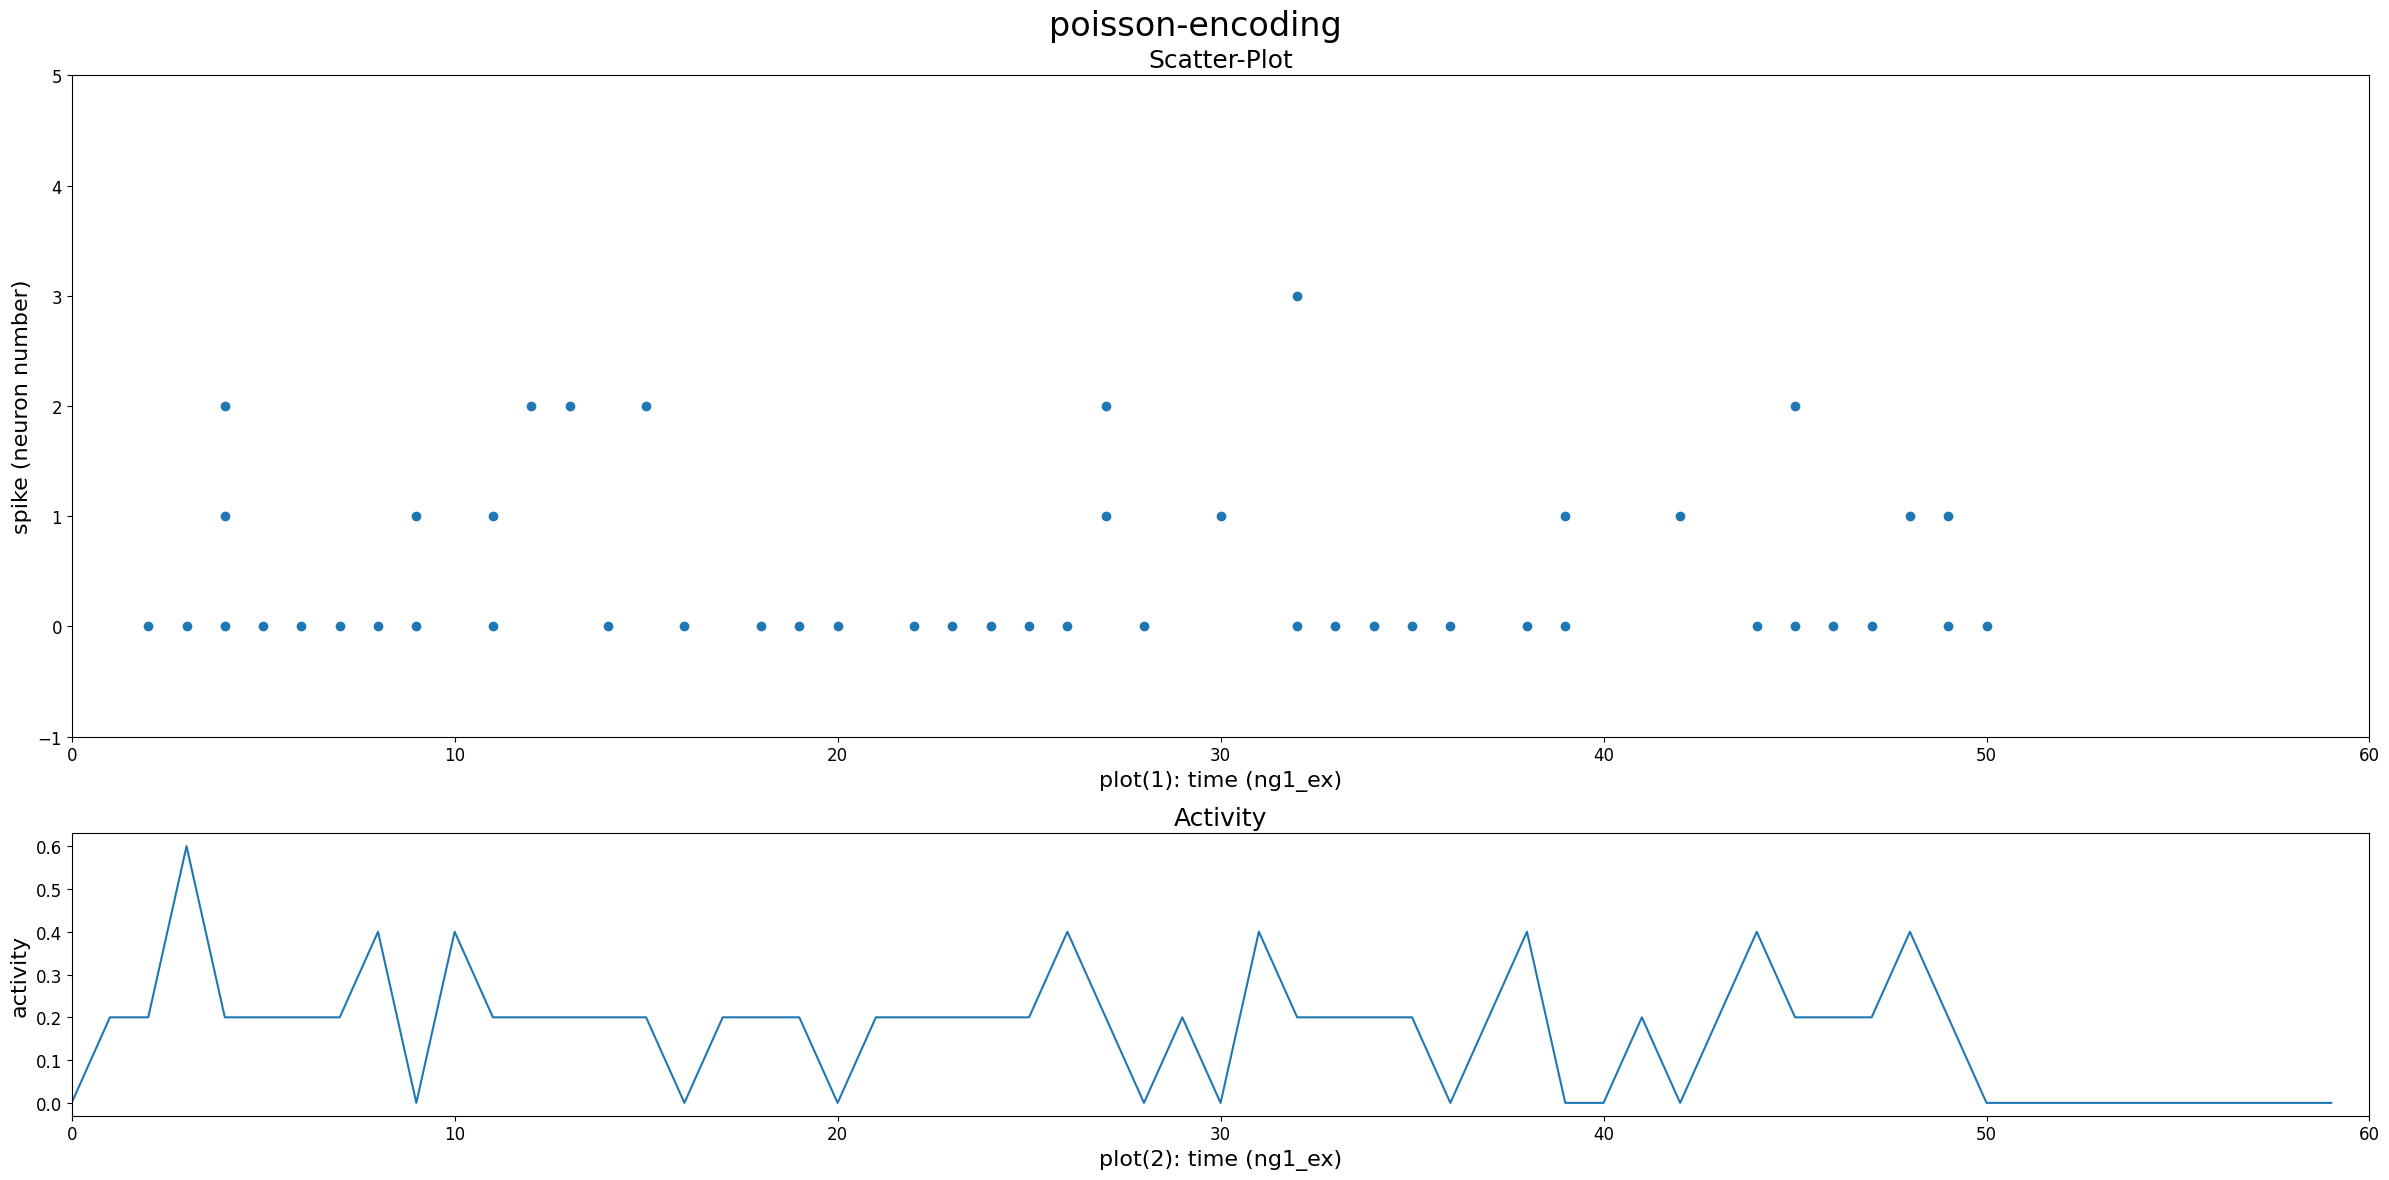

In [22]:
iteration = 60
net = part1(
    iteration=iteration,
    in_size=2,
    syn_model_ex_inh=syn.FullyConnected(j0=1.2, variation=50, tau=2),
    input_data=InputData.Encode(
        data=torch.tensor([[200,60,30,10,0]]),
        range=255,
        time=50,
        method="poisson",
    ),
    title = "poisson-encoding"
)